## COMPONENT 2

- CASMIR SUNNY CHARLES
- UNDERSTANDING AI

In [1]:
# import libraries
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
#import my dataset
videoGame_data = pd.read_csv('Video_Games.csv')

In [3]:
#call sample on the dataframe to observe my dataset
videoGame_data.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1906,Ready 2 Rumble Boxing,PS,1998.0,Sports,Midway Games,0.60,0.41,0.00,0.07,1.08,NaN,NaN,NaN,NaN,NaN,NaN
4176,Shadowrun,X360,2007.0,Role-Playing,Microsoft Game Studios,0.41,0.02,0.00,0.04,0.47,66.0,57.0,7.5,156.0,FASA Studio,M
6020,Nicktoons: Battle for Volcano Island,GC,NaN,Action,Unknown,0.22,0.06,0.00,0.01,0.29,NaN,NaN,7,4.0,Blue Tongue Entertainment,E
5124,Skylanders: SuperChargers,PS3,2015.0,Action,Activision,0.16,0.15,0.00,0.06,0.37,NaN,NaN,4.2,6.0,Vicarious Visions,E10+
1590,Reel Fishing,PS,1996.0,Sports,Natsume,0.99,0.13,0.10,0.04,1.25,NaN,NaN,NaN,NaN,NaN,NaN
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
5549,Teenage Mutant Ninja Turtles 2: Battle Nexus,GBA,2004.0,Action,Konami Digital Entertainment,0.23,0.09,0.00,0.01,0.32,65.0,9.0,tbd,NaN,Konami,E
11437,Adventure Time: The Secret of the Nameless Kin...,3DS,2014.0,Action,Little Orbit,0.00,0.07,0.00,0.00,0.08,65.0,5.0,5.6,8.0,WayForward,E10+
14726,Nisenochigiri: Omoide no Saki e,PSP,2011.0,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
11638,TrackMania DS,DS,2008.0,Racing,Focus Home Interactive,0.06,0.01,0.00,0.01,0.08,75.0,38.0,6.9,12.0,Firebrand Games,E


In [4]:
# check the data types of my dataset

videoGame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


The datatype showed that a couple of columns are not clean and needs to be cleaned out. For example User_Score showed as objects

In [5]:
# check for missing values
videoGame_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

This showed us the lists of columns with NaN values which ranged from Name, Year_of_Release, Publisher,Critic_Score,Critic_Count,User_Score ,User_Count, Developer and 
Rating  

In [6]:
# checking the descirptive features of the numerical dataset
videoGame_data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Taking for an example using the NA_Sales, the avearge showed 0.263330. The median stood at 0.24000 while maximum is 41.360000. We still have for other sales type like that of EU_Sales,JP_Sales and Global_Sales. It is easier to pick out the average sale, median, minimum and maximum sales from the datasset using the .describe method

In [7]:
#checking for duplicates in the dataset.

videoGame_data.duplicated().sum()

0

The data showed no duplication.

In [8]:
#check and select the categorical variables
cat_videoGame_data = videoGame_data.select_dtypes(include = 'object')
cat_videoGame_data.describe()

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


The output and the observation shwed that PS2 came ontop to be the platform withe highest sales while Action is the highest among the Genre when it comes to test. We observed the term tbd which is likely the cause of User_Score coming out as objects. The tbd is also the highest number with the highest score

In [9]:
# print all the categories with their counts loping through all the categories
for col in cat_videoGame_data:
    print(cat_videoGame_data[col].value_counts())


Need for Speed: Most Wanted                         12
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11562, dtype: int64
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO 

### Data Cleaning

#### Cleaning of the Critic_score and Critic_Count

In [10]:
#check the descpritive properties of the column
videoGame_data['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

This showed 13 to be the minimum. We need to explore the Critic_ Count to understand the minimum value to be able to make decision

In [11]:
# Check the descriptive properties of the Critic_Count column
videoGame_data['Critic_Count'].describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

The minimum count we have here is 3. This implies that we don't have any zero number. We can replace the NaN values in the Critic_Score with zero which can also means that there is no value for the column

In [12]:
# replacing the NaN values in the Critic_Score column with zero

videoGame_data['Critic_Score'].fillna(0, inplace = True)

# Same with Critic_Count
# replacing the NaN values in the Critic_Count column with zero

videoGame_data['Critic_Count'].fillna(0, inplace = True)

In [13]:
# perfom sanity check on the dataset

videoGame_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

This shwoed that the two columns (Critic_Count and Critic_Score) are with no NaN values anymore

#### Cleaning of User_Score and User_count

In [14]:
# replacing the tbd observed earlier with NaN
videoGame_data['User_Score'].replace('tbd', np.nan, inplace = True)

In [15]:
# sanity check for NaN values of the User_Score column
videoGame_data['User_Score'].isna().sum()

9129

In [16]:
#convert the User_Score to float data type since we have replaced the tbd with NaN

videoGame_data['User_Score'] = videoGame_data['User_Score'].astype('float')

In [17]:
# check the descriptive values for User_Score
videoGame_data['User_Score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

This showed that we have 0 as the minimum value. It will nit be ideal to replace the missing value with zero. Using the median to replace the missing value looks ideal to me. I also noticed that the datatype is now a float as against the earlier Objects.

In [18]:
# replacing the missing values with median which is 7.500000.
videoGame_data['User_Score'].fillna(videoGame_data['User_Score'].median(), inplace = True)

In [19]:
#check the descriptive statisc of User_score for sanity check.
videoGame_data['User_Score'].isna().sum()

0

In [20]:
# replacing the missing values in User_Count the  with 0
videoGame_data['User_Count'].fillna(0, inplace = True)

In [21]:
# sanity check for NaN values on User_Count
videoGame_data['User_Count'].isna().sum()

0

#### Cleaning the Rating Column

It is good to note that Rating is not number. There is posibilitty of people also refusing to rate. To solve the NaN issues, I will replace the NaN values with 'Unknown' 

In [22]:
# filling the NaN value with 'Unknown'

videoGame_data['Rating'].fillna('Unknown', inplace = True)

#### Cleaning of Genre

The column has only 2 missing values hence I will drop the rows.

In [23]:
# drop the rows of the missing number
videoGame_data.dropna(subset = ['Genre'], inplace = True)

In [24]:
videoGame_data.reset_index(drop = True, inplace = True)

It is good to note that the Developer column is not contributing anything in the building of my model hence I did not go into the data cleaning despite knowing that it has lots of missing values.

In [25]:
# sanity check on my dataset after my cleaning
videoGame_data.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating                0
dtype: int64

The showed that in cleaning out the Genre, the Name column was also cleaned.Also because of the importance of Platform in the dataset as it is a big contributor to the development of my model, I need to look at it and see how to ensure that I make good use of it.

In [26]:
# checking the value counts of the column Platform

videoGame_data['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

This showed that there are lots of rows in this column with different values which if not taking care of can lead to overfitting. I will have to focus on the platform that are used more. That is platform used more than 1000 times and above

In [27]:
#set threshold to 999
threshold = 999

#get the value count of the platforms
ValueCount = videoGame_data['Platform'].value_counts()

#filter out those platform with at least 999 occurances.
PlatformList = ValueCount[ValueCount.values>= threshold].index.tolist()


        
        

In [28]:
PlatformList

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [29]:
#create an empty list
Val_platform = []

for i in range(videoGame_data.shape[0]): # iterate over all rows in the data
    txt = videoGame_data.Platform.values[i] # get the values in the platform column
    flag = 0 # set the flag variable
    for item in PlatformList: # iterate over the platform in consideration
        if item in txt and flag == 0:
            Val_platform.append(item)
            flag = 1
    if flag == 0: # that is if the row values are different form studio lists considred
        Val_platform.append('Others')

In [30]:
# creating a new column called Platformprinary
videoGame_data['Platformprimary'] = Val_platform

In [31]:
# perform sanity check on the column

videoGame_data['Platformprimary'].value_counts()

Others    4593
DS        2672
PS2       2161
PS        2022
Wii       1467
PS3       1331
X360      1262
PSP       1209
Name: Platformprimary, dtype: int64

This showed that all the once with values less than 999 are grouped together and named as others with the value of 4593.I will now the final sanity check on my dataset

In [32]:
# Final sanity check on my dataset
videoGame_data.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating                0
Platformprimary       0
dtype: int64

In [33]:
videoGame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        10096 non-null  object 
 15  Rating           16717 non-null  object 
 16  Platformprimary  16717 non-null  object 
dtypes: float64(1

All the columns required for my model are cleaned. I will now to the next step which are visualization and finally the building of the model

### Data Visualization

#### visualization for the numerical variables

In [34]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

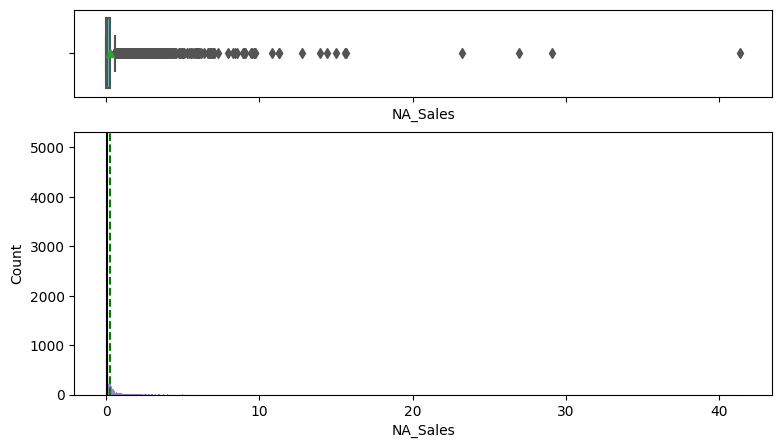

In [35]:
#Visualizing the NA_Sales
histogram_boxplot(data =videoGame_data, feature = 'NA_Sales' )

The distribution is right skewed with the mean and median very close to each other. There are also alot of outliers

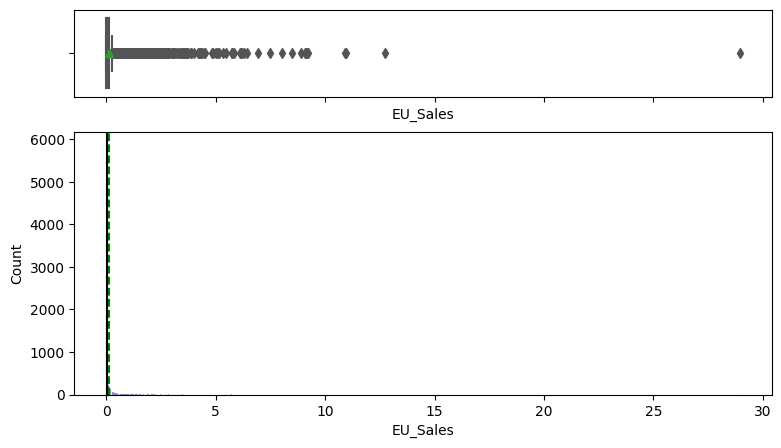

In [36]:
#Visualizing the EU_Sales
histogram_boxplot(data =videoGame_data, feature = 'EU_Sales')

The distribution is right skewed with the mean and median very close to each other. There are also alot of outliers

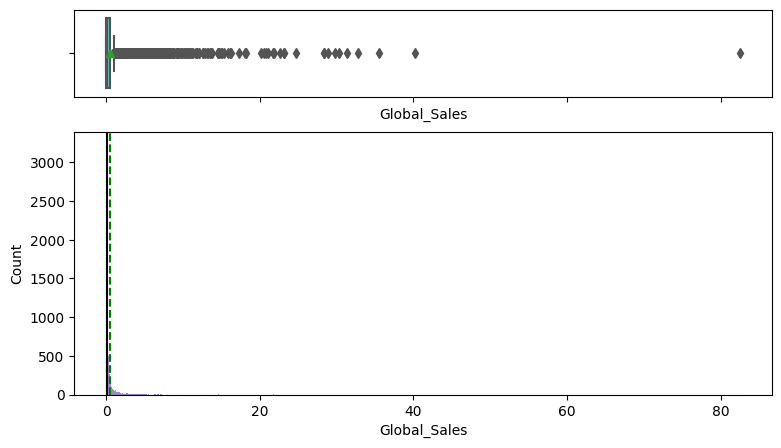

In [37]:
histogram_boxplot(data =videoGame_data, feature = 'Global_Sales')

The distribution is right skewed with the mean and median very close to each other. There are also alot of outliers

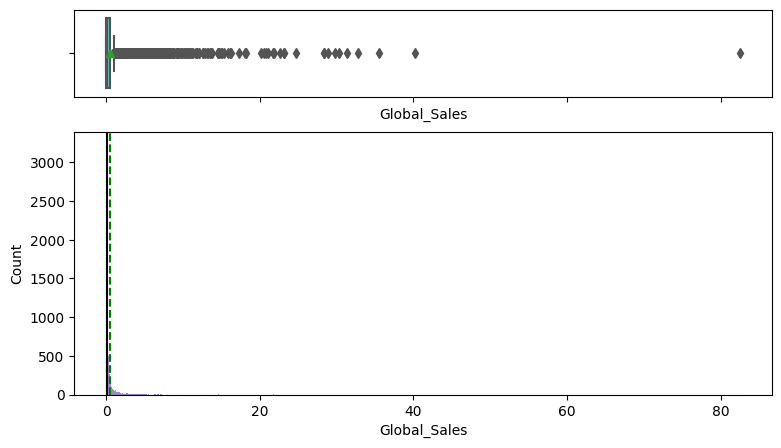

In [38]:
histogram_boxplot(data =videoGame_data, feature = 'Global_Sales')

The distribution is right skewed with the mean and median very close to each other. There are also alot of outliers

#### visualization for the Categorical variables

In [39]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

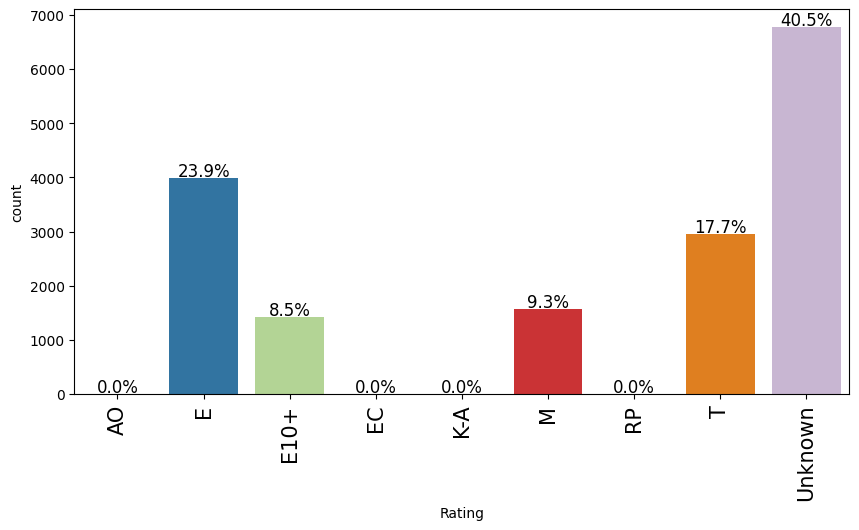

In [40]:
labeled_barplot(data = videoGame_data, feature = 'Rating', perc = True)

For the Rating, The Excellent is the highest ratings that were given by the reviewers. The E is followed by T

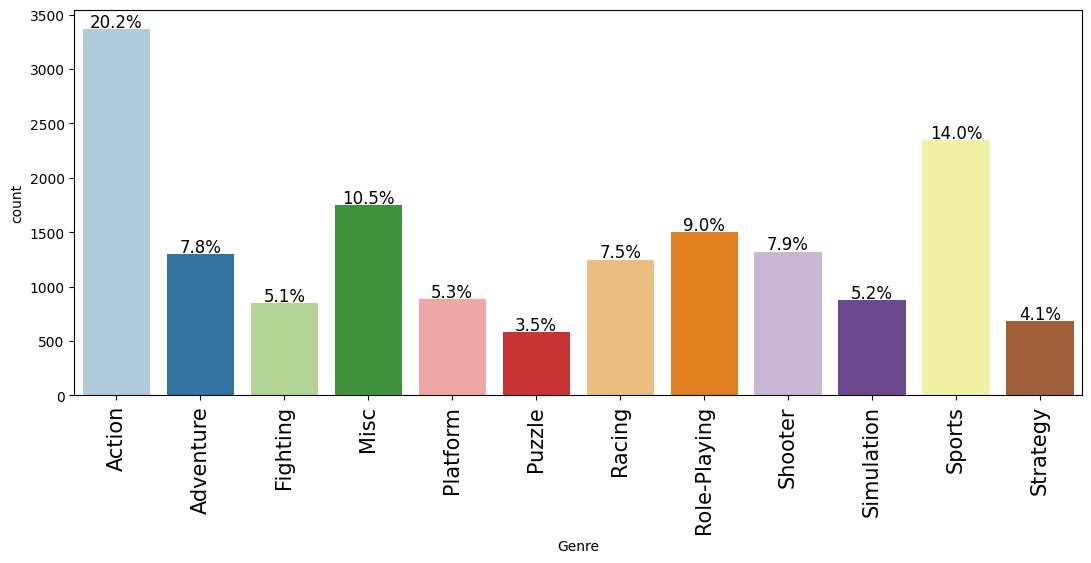

In [41]:
# Visualizing for Genre
labeled_barplot(data = videoGame_data, feature = 'Genre', perc = True)

This showed that highest selling Genre is the Action followed by Sports. Puzzle is the least among them.

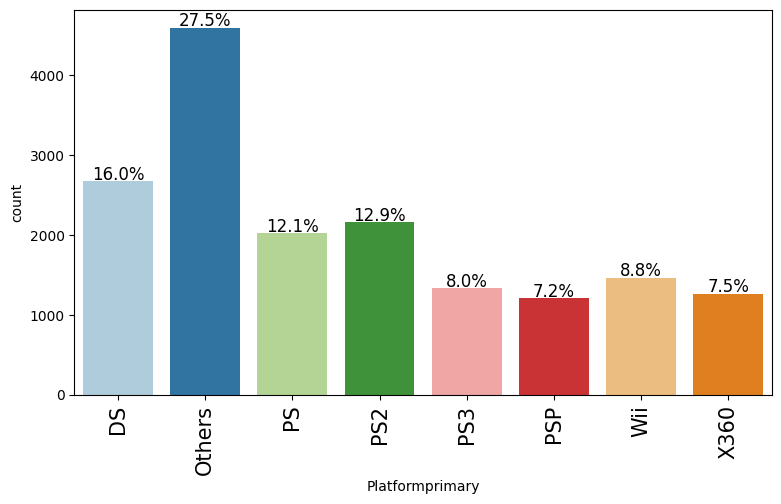

In [42]:
# Visualizing for Genre. The new column created
labeled_barplot(data = videoGame_data, feature = 'Platformprimary', perc = True)

The new grouped OTHERS has the highest value. That is the group of all the features with less than 999 values. The DS platform was used the most followed by PS2

### Bivariate Analysis

In [43]:
numericData = videoGame_data.select_dtypes(include = 'number')

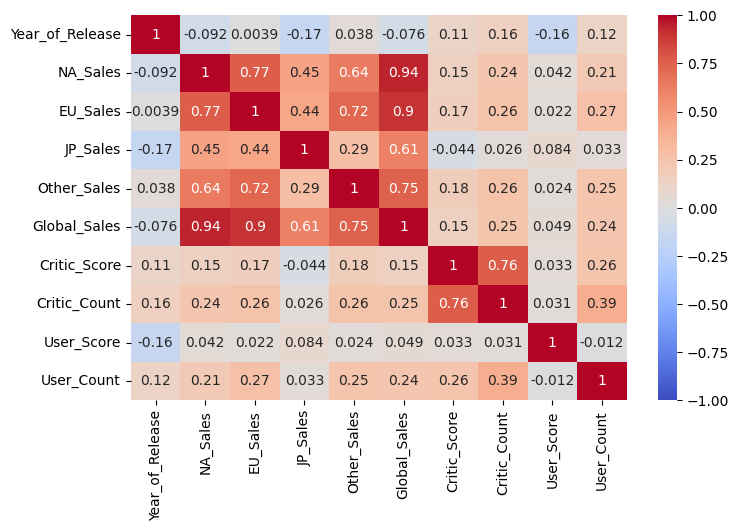

In [44]:
# calculate correlation
mat_cor = numericData.corr()
plt.figure(figsize = (8,5))
sns.heatmap(mat_cor, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

The correlation plots shwoed that NA_Sales and EU_Sales has positive relationship with Global Sales. Critic score always corresponds positively Critic_count. The sales in North America, EU_Sales, Japa_Sales showed that they will contribute well to Global sales

In [45]:
# Create function for scatterplot visualize numerical variables
def customer_plot(x,y, title,data =videoGame_data):
    plt.figure(figsize = (6,4))
    sns.scatterplot(x = x, y = y, data = videoGame_data)
    plt.title(title)
    plt.show()

#### NA_sale Vs Global Sale

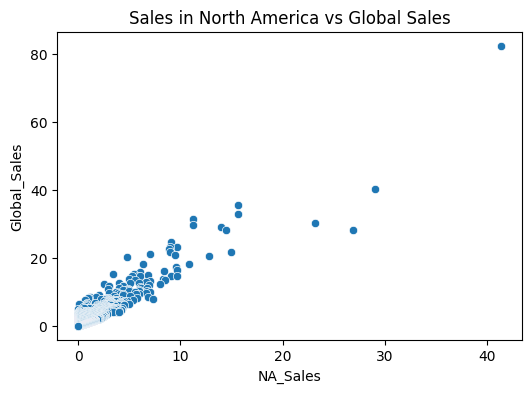

In [46]:
customer_plot(x = 'NA_Sales', y = 'Global_Sales',
             title = 'Sales in North America vs Global Sales')

The relationship looks positive. This showed that as NA_Sales increase the Global Sales also increased. There seems to be strong or positive relationship.This also implies that the sales in North America has the potential to decrease the Global Sales.

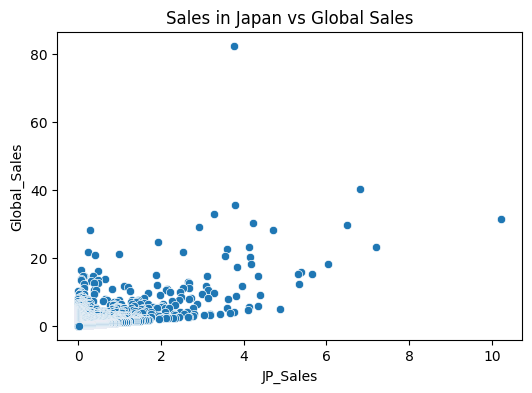

In [47]:
customer_plot(x = 'JP_Sales', y = 'Global_Sales',
             title = 'Sales in Japan vs Global Sales')

The visualization showed almost weak or no relationship between Japan Sales and Global Sales.

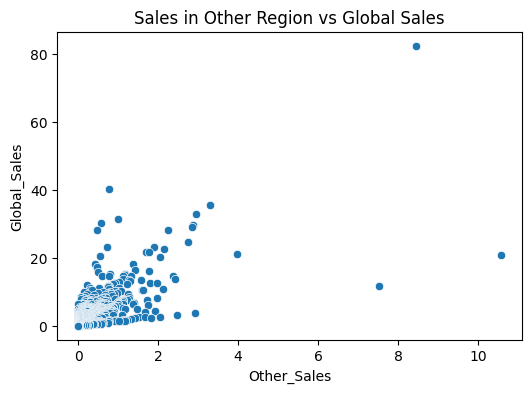

In [48]:
customer_plot(x = 'Other_Sales', y = 'Global_Sales',
             title = 'Sales in Other Region vs Global Sales')

This has a posititive relationship. This implies that other sales contributes positively to Global Sales. However, this relationship is a weak one though.

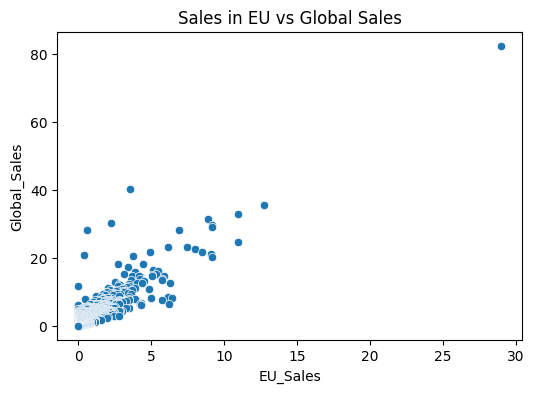

In [49]:
customer_plot(x = 'EU_Sales', y = 'Global_Sales',
             title = 'Sales in EU vs Global Sales')

This has a posititive relationship. This implies that other sales contributes positively to Global Sales.

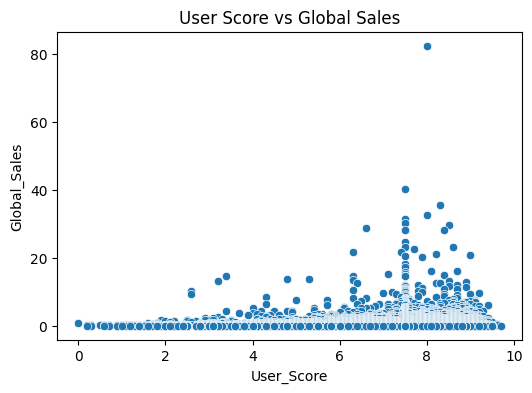

In [50]:
customer_plot(x = 'User_Score', y = 'Global_Sales',
             title = 'User Score vs Global Sales')

User_Score has no relationship with the Global Sales. This showed that User Score does not contribute to the growth of Global Sales

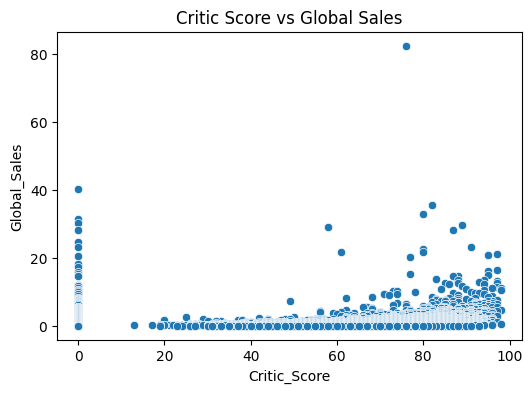

In [51]:
customer_plot(x = 'Critic_Score', y = 'Global_Sales',
             title = 'Critic Score vs Global Sales')

Critic_Score has no relationship with the Global Sales. This showed that User Score does not contribute to the growth of Global Sales

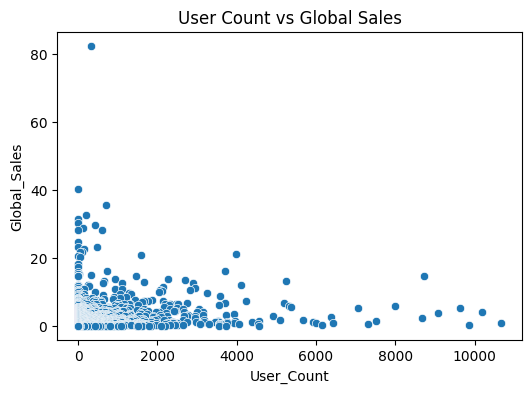

In [52]:
customer_plot(x = 'User_Count', y = 'Global_Sales',
             title = 'User Count vs Global Sales')

User_Count has no relationship with the Global Sales. This showed that User Score does not contribute to the growth of Global Sales

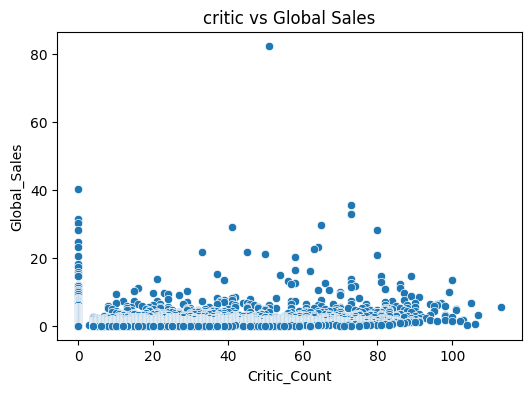

In [53]:
customer_plot(x = 'Critic_Count', y = 'Global_Sales',
             title = 'critic vs Global Sales')

Critic_Count has no relationship with the Global Sales. This showed that User Score does not contribute to the growth of Global Sales

Text(0.5, 1.0, 'Rating vs Global Sales')

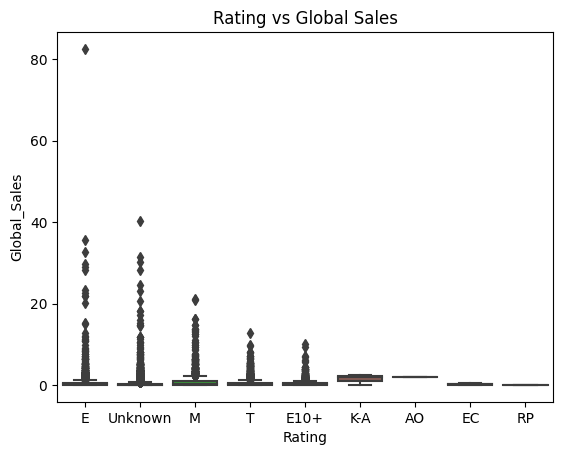

In [54]:
#using boxplot to visualize Rating against the target Global Sales

sns.boxplot(x = 'Rating', y = 'Global_Sales', data = videoGame_data)
plt.title('Rating vs Global Sales')

We have lots of outliers here especially on the E and Unknwn column. The E, M and T all seems to have positive relationships with Global Sales

Text(0.5, 1.0, 'Platformprimary vs Global Sales')

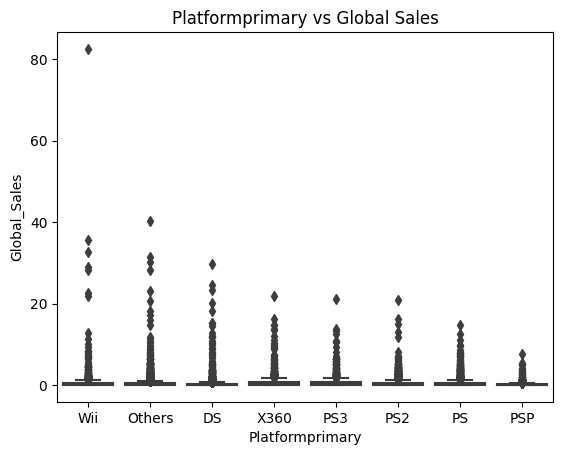

In [55]:
sns.boxplot(x = 'Platformprimary', y = 'Global_Sales', data = videoGame_data)
plt.title('Platformprimary vs Global Sales')

### Outlier Detection and Handling

In [56]:
videoGame_data['NA_Sales'].describe()

count    16717.000000
mean         0.263255
std          0.813475
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_Sales, dtype: float64

It is even easier to see where the outlier is coming from. The figure where we have max with value 41.36 is where the outlier is coming from. I have to use the numerical data created earlier

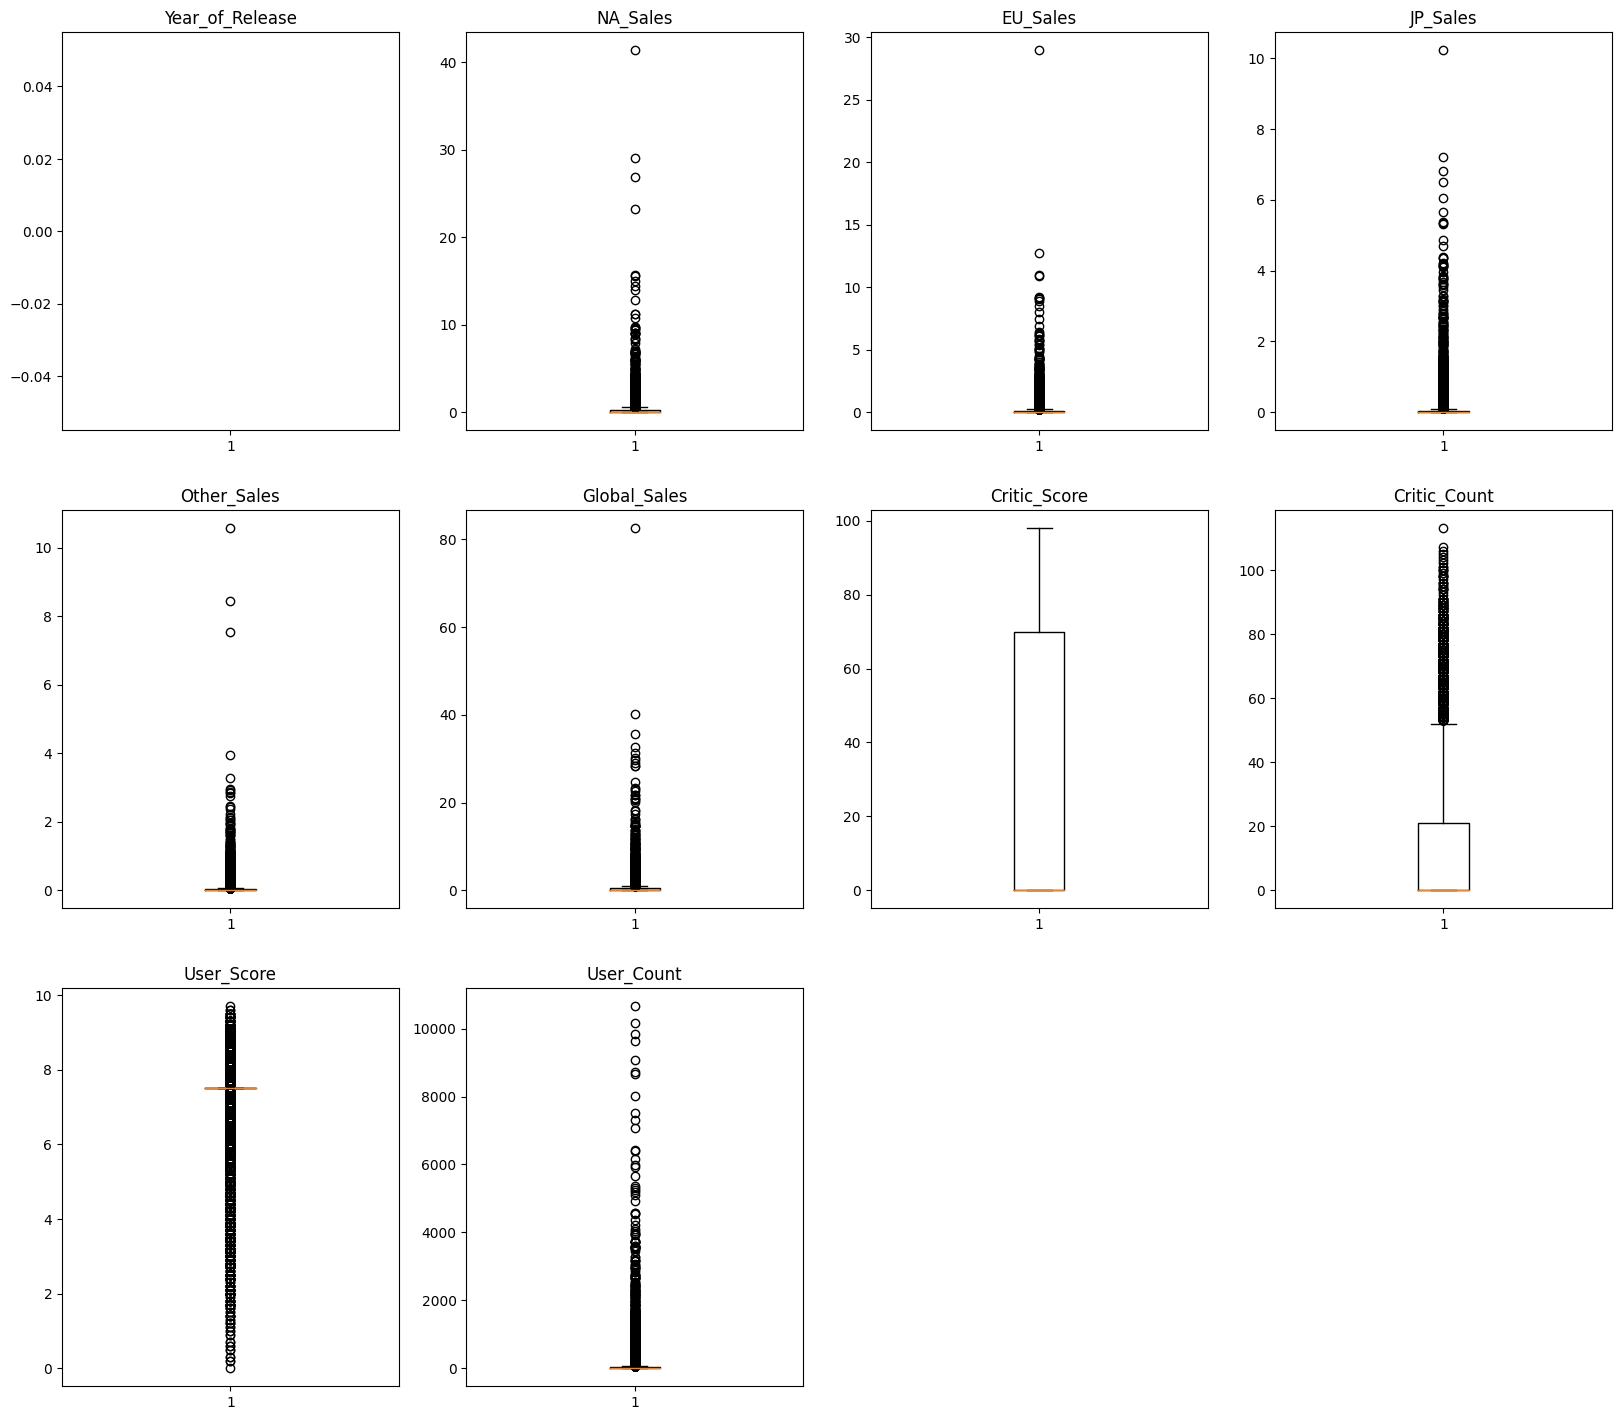

In [57]:
#Using boxplot for the detection
plt.figure(figsize = (20,30))

for i, variable in enumerate(numericData):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(videoGame_data[variable])
    plt.title(variable)
    
    

The outliers are clearly shown here. We will treat them with the exception of the target which is the Global Sales. The outliers found are at the upper end except User_Score that has outliers at both ends

In [58]:
#Treating the outliers
numericData.drop('Global_Sales', axis = 1, inplace = True)

In [59]:
# sanity check on numericData
numericData.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [60]:
#create a function to treate outliers
def treat_outliers(videoGame_data, col):
    '''
    treat outliers found in variables
    col: str, name of the numerical variable
    videoGame_data: dataframe
    '''
    Q1 = videoGame_data[col].quantile(0.25) # 25th quantile
    Q3 = videoGame_data[col].quantile(0.75) # upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    videoGame_data[col] = np.clip(videoGame_data[col], lower_whisker, upper_whisker)
    return videoGame_data

# define a function to treat all the variables

def treat_outliers_all(videoGame_data,col_list):
    for c in col_list:
        videoGame_data = treat_outliers(videoGame_data,c)
    return videoGame_data

In [61]:
videoGame_data = treat_outliers_all(videoGame_data,numericData)

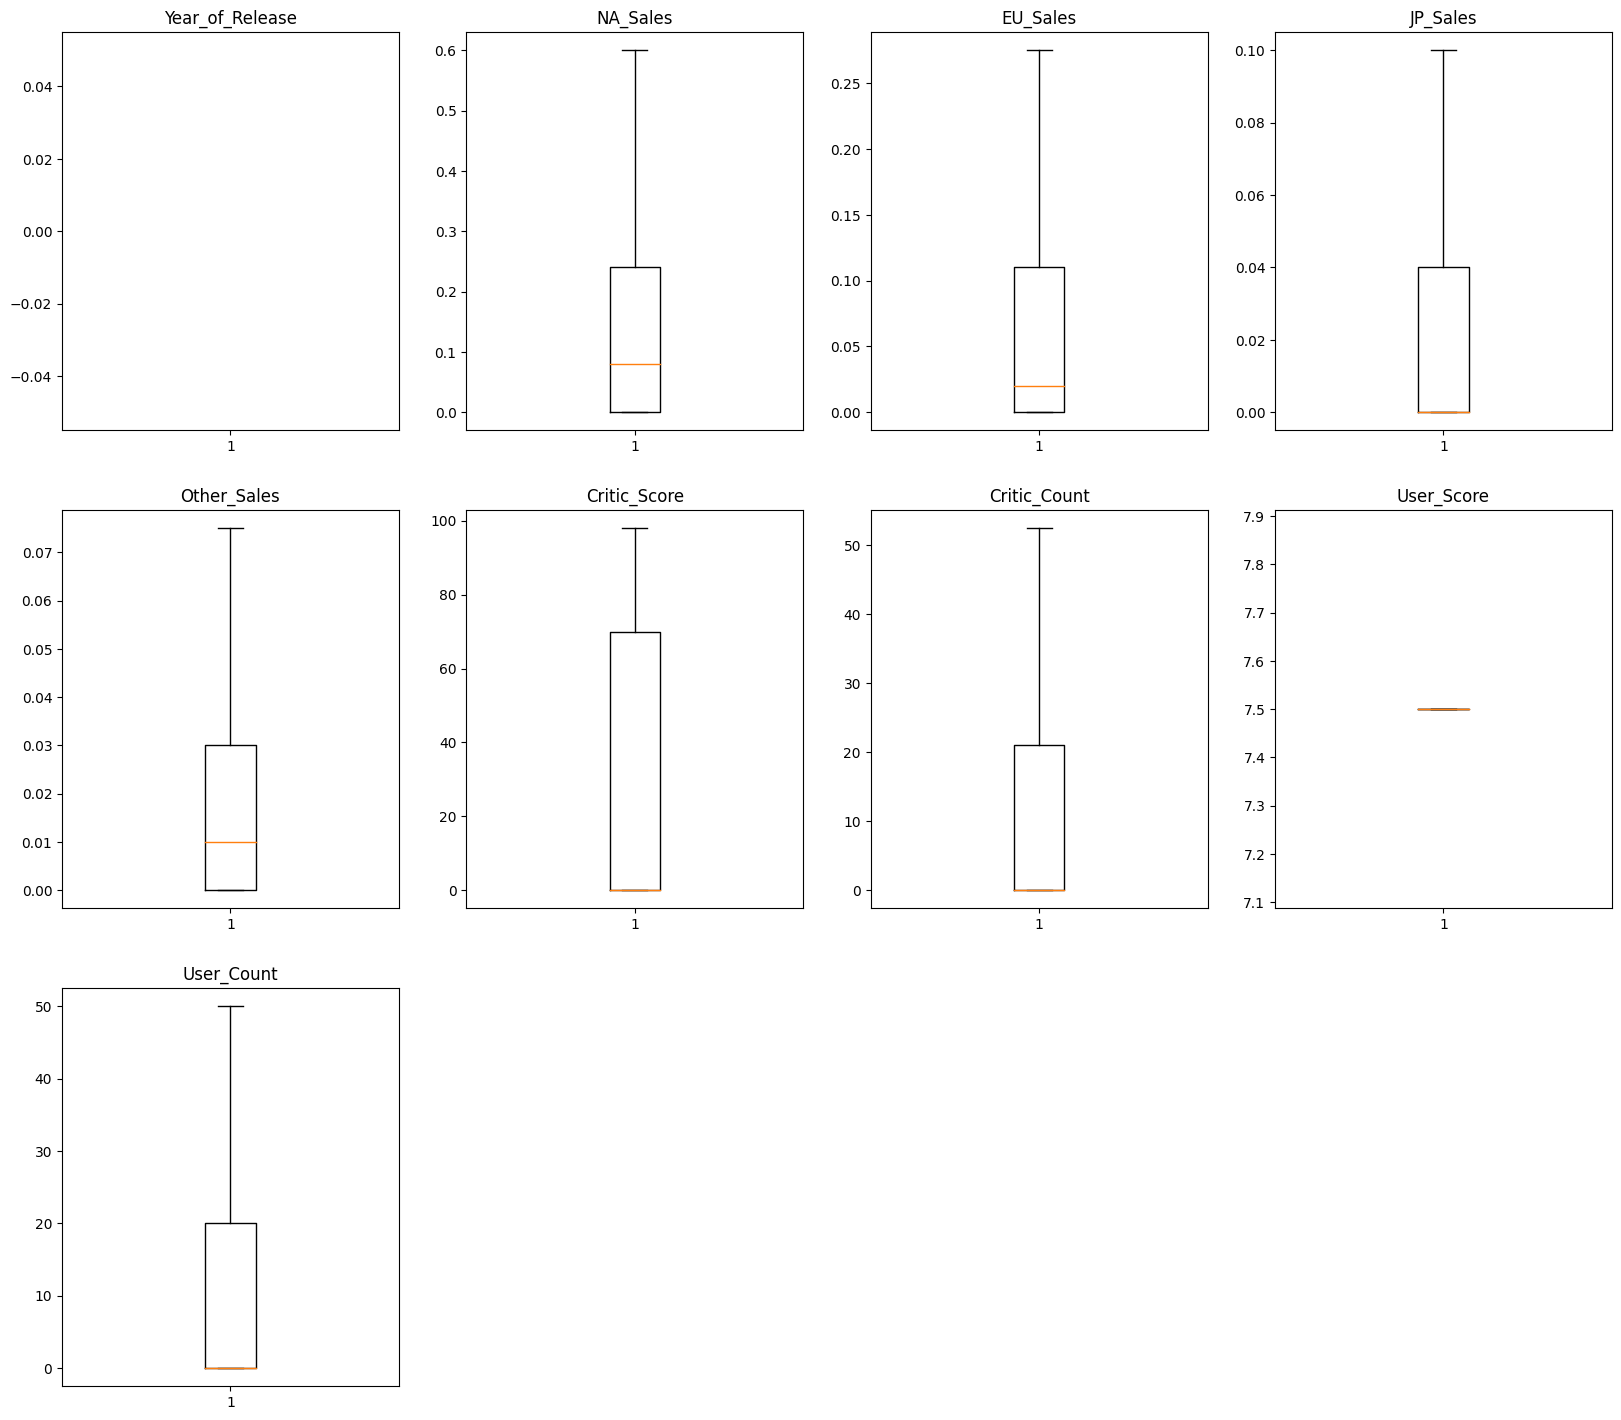

In [62]:
#sanity checks on the treated outliers using boxplot
plt.figure(figsize = (20,30))

for i, variable in enumerate(numericData):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(videoGame_data[variable], whis = 1.5)
    plt.title(variable)
plt.show()

The outliers have been cleaned out or treated.I need to transform the log of the target which is the Global Sales. This will help to make the right skewed or skewed variable to to be normal

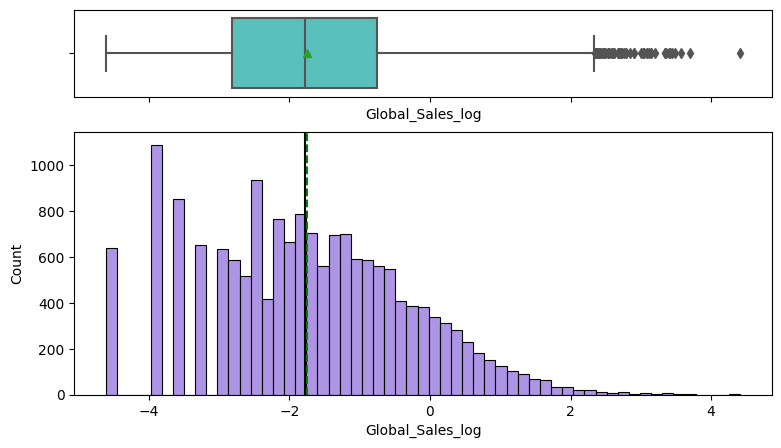

In [63]:
#transgform the target using log transformation
videoGame_data['Global_Sales_log'] = np.log(videoGame_data['Global_Sales'])
histogram_boxplot(data = videoGame_data, feature = 'Global_Sales_log')

Our Global Sales which is the target has been transformed. The target is approximately normal now.With this I have satisfied the assumption or requirement for linearity and normality.Our model needs to satisfy the assumptions of linerity and normality. The Global_Sales_log will now become our new target.

#### 2c. What propelled the choice of your regressor for this task? Aptly discuss with quantitative reasons!

- Five models will be using Linear Regression, Ridge Regression, Lasso Regression, RandomForest and Gradient Boosting. 
- The five models will be analyzed to choose the best perfoming once to enable me make a choice for my regressor

#### Build the Model

In [64]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

In [65]:
#select feature and target
x = videoGame_data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
                   'User_Score', 'User_Count', 'Rating', 'Platformprimary']]
y = videoGame_data['Global_Sales_log'] + 1e-10

In [66]:
#Since Machine learning does not handle missing values, I will carry sanity check on the features selected

x.isna().sum()

Genre              0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
Platformprimary    0
dtype: int64

However we still have some faetures in text in our X. This will lead us to applying OneHotEncoding. This is because machine learning cannot handle raw text

In [67]:
# convert all categorical features to numerical data (OneHotEncoding)
x = pd.get_dummies(x, drop_first = True)
x.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Genre_Adventure,Genre_Fighting,...,Rating_RP,Rating_T,Rating_Unknown,Platformprimary_Others,Platformprimary_PS,Platformprimary_PS2,Platformprimary_PS3,Platformprimary_PSP,Platformprimary_Wii,Platformprimary_X360
0,0.6,0.275,0.1,0.075,76.0,51.0,7.5,50.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.6,0.275,0.1,0.075,0.0,0.0,7.5,0.0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0.6,0.275,0.1,0.075,82.0,52.5,7.5,50.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.6,0.275,0.1,0.075,80.0,52.5,7.5,50.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.6,0.275,0.1,0.075,0.0,0.0,7.5,0.0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Split the training set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)




In [69]:
#check the shape of x-train

x_train.shape

(10698, 34)

In [70]:
x_train.shape

(10698, 34)

In [71]:
#check the shape of x-test

x_test.shape

(3344, 34)

In [72]:
# Normalize the data. Please note that only the fit_transformation is called only on the training.
scaler = StandardScaler()
x_train_sd = scaler.fit_transform(x_train)

# for validation we don't need to recalculate the mean. We will use the one calculated mean from training
x_val_sd = scaler.transform(x_val) 
x_test_sd = scaler.transform(x_test)

In [73]:
#Build the linear regression model

lin_reg = LinearRegression()

# build the model
lin_reg.fit(x_train_sd, y_train)



LinearRegression()

The model has been trained

In [74]:
#check the performance of the trained model
# import the performance measuring libries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [75]:
# Create a function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# create function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# cretae a function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predict using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  #  to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred) # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            'MAPE': mape,
        },
        index=[0],
    )

    return df_perf


#### Interprets Model performance

In [76]:
#performance measurement of the trained moded
lin_reg_train = model_performance_regression(lin_reg, x_train_sd, y_train)
lin_reg_train 

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.626629,0.492851,0.817138,0.816555,8.243071e+08


The R-square is 81.7% while Adjusted R-square is 81.6% percent which is a good result.Approximately 81.7% variation in Global Slaes variables was explained by all the individual features in the data. This showed that this feature is not bad as it is very close to Adj. R-squared which is just a little bit lesser. The root mean square error is 0.626629 while mean absolut error is 0.492884

In [77]:
#performance measurement of the validation moded

#performance measurement of the trained moded
lin_reg_val = model_performance_regression(lin_reg, x_val_sd, y_val)
lin_reg_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.635786,0.497727,0.808655,0.806191,1.251860e+09


The model is generalizing well as we can see that the difference between R-squared in the trained model (0.817138) is not much difference when compared with R-square performance of the Validation model (0.808644). The same thing applies to the the Adjusted R-square of the trained model where the value is 0.816555 and that of validation model is 0.806179. I can say that the model is not overfitting. However, I will be able to conclude on this and give my final opinion on this after treating the multi-correnearity observed through the heatmap correlation. 

#### Calculating the Coefficients

In [78]:
# interpretation of coefficients

print(lin_reg.coef_)
print(x_train.columns)

[ 6.63855915e-01  2.54939231e-01  4.34225008e-01  4.31843911e-01
  1.66395013e-02  2.97829572e-02 -7.98605259e+09 -1.36323153e-01
 -7.90015095e-02  2.58093876e-03  2.90236563e-02  7.03814081e-03
 -1.41330824e-02  1.26267640e-02  1.89491712e-02 -1.20186823e-03
  7.63620033e-03  5.18708735e-02 -9.80792168e-03 -2.63207197e+11
 -1.73797336e+11 -1.46551066e+10 -5.98432096e+09 -1.79620655e+11
 -8.46271227e+09 -2.37198669e+11 -3.03772808e+11  8.60674327e-02
  1.16247744e-02  5.20885470e-03 -2.25774595e-02 -4.86843591e-02
  1.90646998e-02  2.85251993e-02]
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E',
       'Rating_E10+', 'Rating_EC', 'Rating_K-A', 'Rating_M', 'Rating_RP',
       'Rating_T', '

In [79]:
# we can use for a loop to print this directly to be able to match the features directly with their various coefficints.


for i, col in enumerate (x_train.columns):
    print(f'{col} has coefficient of {np.exp(lin_reg.coef_[i])}')

NA_Sales has coefficient of 1.9422671300736807
EU_Sales has coefficient of 1.2903832030096463
JP_Sales has coefficient of 1.5437661891676913
Other_Sales has coefficient of 1.5400947045735442
Critic_Score has coefficient of 1.016778708816765
Critic_Count has coefficient of 1.030230905458368
User_Score has coefficient of 0.0
User_Count has coefficient of 0.8725606159264945
Genre_Adventure has coefficient of 0.9240385295894403
Genre_Fighting has coefficient of 1.0025842722470735
Genre_Misc has coefficient of 1.029448947169148
Genre_Platform has coefficient of 1.0070629667288424
Genre_Puzzle has coefficient of 0.9859663207587023
Genre_Racing has coefficient of 1.0127068181624128
Genre_Role-Playing has coefficient of 1.0191298461990974
Genre_Shooter has coefficient of 0.9987988537212499
Genre_Simulation has coefficient of 1.0076654304579056
Genre_Sports has coefficient of 1.0532397326095628
Genre_Strategy has coefficient of 0.9902400191248892
Rating_E has coefficient of 0.0
Rating_E10+ has 

This implies that for every 1 unit of sales in NA_Sales, the Global Sales will increase by 1.9422671310150075.Also for every 1 unit of sales in EU_Sales, the Global Sales will increase by 1.2903817386092526.For every 1 unit of sales in JP_Sales, the Global Sales will increase by 1.5438442729074173.And  for every 1 unit of sales in Other_Sales, the Global Sales will increase by 1.5400665595829999

We will build model with Ridge regression to see what will be the outcome when compared with Linear regression. It will also help us to handle multi-collinearity

#### Building the model with Ridge regression

In [80]:
#import thr Ridge libry
from sklearn.linear_model import Ridge

In [81]:
# initiate the model
ridge = Ridge(random_state=0)

In [82]:
#train the model
ridge.fit(x_train_sd, y_train)

Ridge(random_state=0)

In [83]:
# Create function to enable us observe the performance of ridge regression on tarin data

def get_coeff(x_train, model):
    for i, col in enumerate (x_train.columns):
        print(f'{col} has coefficient of {np.exp(model.coef_[i])}')


In [84]:
#check the performance of the ridge regression
ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
ridge_train


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.626628,0.492832,0.817138,0.816555,8.239307e+08


In [85]:
# check performance of the validation
ridge_val = model_performance_regression(ridge, x_val_sd,y_val)
ridge_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.635796,0.497692,0.808649,0.806185,1.251609e+09


#### Building the model with Lasso regression

In [86]:
# applying less regularization to see what the performance of the model will be

#import the Lasso libry
from sklearn.linear_model import Lasso
alpha_values = np.linspace(0.001, 0.2, num = 10) # running through a loop 10 times to see different peformance values

#building of lasso model and checking the performace coefficients
for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha = alpha)
    lasso.fit(x_train_sd, y_train)
    lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
    print(lasso_train)
    print(alpha) # to enable me understand the alpha value that gives each performance

       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.626676  0.492902    0.81711        0.816527  8.209594e+08
0.001
       RMSE      MAE  R-squared  Adj. R-squared          MAPE
0  0.635935  0.49904   0.811666        0.811066  7.639431e+08
0.023111111111111114
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.645434  0.503733   0.805998        0.805379  7.398724e+08
0.045222222222222226
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.655104  0.507662   0.800141        0.799504  7.233171e+08
0.06733333333333334
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.662854  0.509883   0.795384        0.794732  6.930196e+08
0.08944444444444445
      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.67257  0.513413   0.789342         0.78867  6.624175e+08
0.11155555555555556
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.683139  0.517675    0.78267        0.781977  6.313907e+08
0.133666666666

This improved the performance of Lasso a little. I will now use the value of 0.001 to rebuild my model using Lasso.

In [87]:
lasso = Lasso(random_state=0, alpha = 0.001)
lasso.fit(x_train_sd, y_train)
lasso_train = model_performance_regression(lasso, x_train_sd, y_train)
lasso_train


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.626676,0.492902,0.81711,0.816527,8.209594e+08


In [88]:
lasso_val = model_performance_regression(lasso, x_val_sd, y_val)
lasso_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.635632,0.497801,0.808748,0.806285,1.243408e+09


### Applying Tree based Regressors 

#### RandomForest

In [89]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [90]:
#reconfirm the shapes of the splitted datas
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(10698, 34)
(2675, 34)
(3344, 34)


In [91]:
 #train the randormforest model
rf = RandomForestRegressor(random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [92]:
# Carry out performance checks
rf_train = model_performance_regression(rf,x_train, y_train)
rf_train 

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.181364,0.073864,0.984682,0.984633,1.926649e+08


In [93]:
# Carry out performance checks
rf_val = model_performance_regression(rf,x_val, y_val)
rf_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.279899,0.141513,0.962915,0.962437,6.244057e+08


##### Visualize the Feature importance fromthe Random Forest Modle

In [94]:
feat_names = x_train.columns.to_list()

In [95]:
importances = rf.feature_importances_ 
# please note that the higher the value the more important contributions the variables contributes 

In [96]:
importances

array([6.73712141e-01, 4.78488218e-02, 1.33646098e-01, 1.22381101e-01,
       3.58965284e-03, 2.73529062e-03, 0.00000000e+00, 1.44342849e-03,
       4.40916359e-04, 4.83896727e-04, 6.98803149e-04, 5.11928850e-04,
       5.29860334e-04, 5.57966778e-04, 1.12713493e-03, 5.65819007e-04,
       5.37497889e-04, 9.85419028e-04, 2.83619158e-04, 4.13469625e-04,
       3.51933559e-04, 1.35661275e-06, 5.53886570e-06, 2.74042954e-04,
       4.40316110e-07, 4.50426072e-04, 5.45385916e-04, 1.82662014e-03,
       1.25771999e-03, 9.04428199e-04, 5.32181522e-04, 3.81611745e-04,
       5.99462718e-04, 3.75986872e-04])

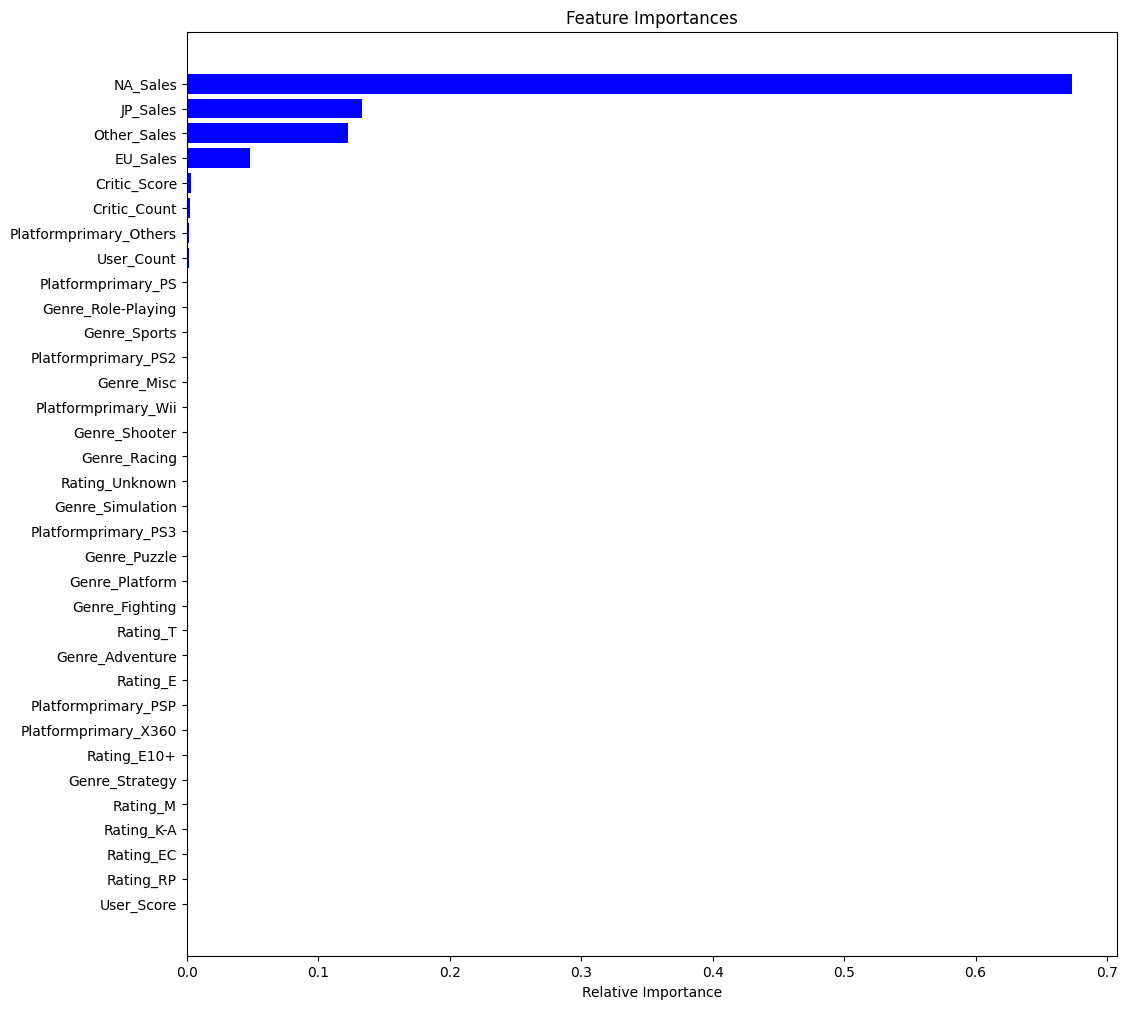

In [97]:
#visiualizing
indices = np.argsort(importances)
plt.figure(figsize = (12,12))
plt.title ('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'blue',
        align = 'center')
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### GradientBoosting

In [98]:
 #train the model
gb = GradientBoostingRegressor(random_state = 0)
gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [99]:
# Carry out performance checks on the train data
gb_train = model_performance_regression(gb,x_train, y_train)
gb_train 

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.281719,0.163248,0.96304,0.962922,3.760343e+08


In [100]:
# Carry out performance checks on val
gb_val = model_performance_regression(gb,x_val, y_val)
gb_val 

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.296065,0.173261,0.958508,0.957973,7.887518e+08


In [101]:
# Carry out performance checks on val
gb_test = model_performance_regression(gb,x_test, y_test)
gb_test 

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.276433,0.162047,0.964584,0.96422,1.173529e+08


#### Visualize the Feature importance fromthe Random Forest Model

#### 2a.Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why? Provide quantitative justifications for your answers.

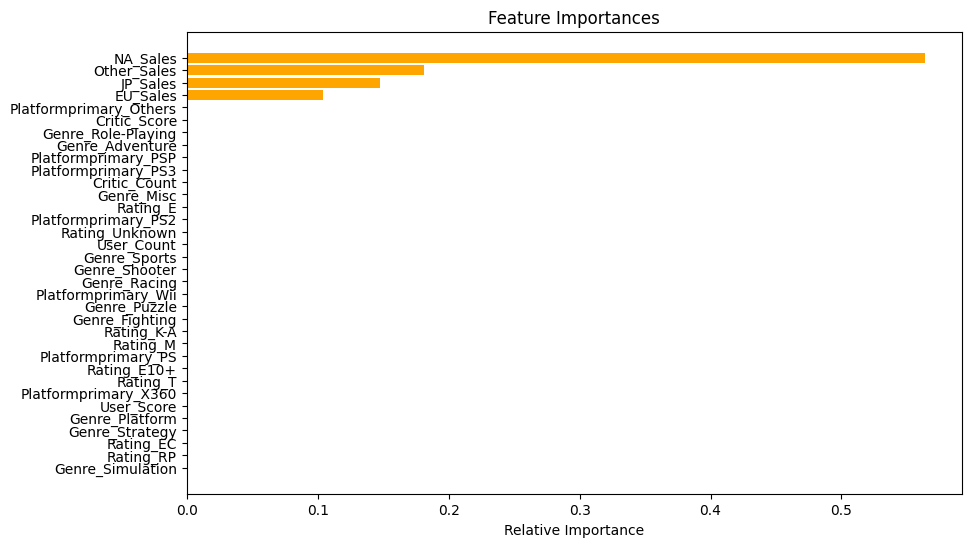

In [102]:
#visiualizing
importances = gb.feature_importances_ 
indices = np.argsort(importances)

plt.figure(figsize = (10,6))
plt.title ('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'orange',
        align = 'center')
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [103]:
for col, coef in zip(x_train.columns, gb.feature_importances_):
    print(f'{col} has feature importance of {coef:.4f}')

NA_Sales has feature importance of 0.5636
EU_Sales has feature importance of 0.1040
JP_Sales has feature importance of 0.1477
Other_Sales has feature importance of 0.1810
Critic_Score has feature importance of 0.0008
Critic_Count has feature importance of 0.0001
User_Score has feature importance of 0.0000
User_Count has feature importance of 0.0001
Genre_Adventure has feature importance of 0.0002
Genre_Fighting has feature importance of 0.0000
Genre_Misc has feature importance of 0.0001
Genre_Platform has feature importance of 0.0000
Genre_Puzzle has feature importance of 0.0000
Genre_Racing has feature importance of 0.0000
Genre_Role-Playing has feature importance of 0.0003
Genre_Shooter has feature importance of 0.0000
Genre_Simulation has feature importance of 0.0000
Genre_Sports has feature importance of 0.0001
Genre_Strategy has feature importance of 0.0000
Rating_E has feature importance of 0.0001
Rating_E10+ has feature importance of 0.0000
Rating_EC has feature importance of 0.

#### 2b. What effect will the number of critics and users as well as their review scores have on the sales of Video games in North America, EU, and Japan?

###### Using North America as my target and applying Gradient Boosting

In [104]:
#select feature and target
x_NA = videoGame_data[['Critic_Score', 'Critic_Count','User_Score', 'User_Count']]
y_NA = videoGame_data['NA_Sales']

There is no need for onehotencoding since they are all numeric

In [105]:
#split the data
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
x_train_na, x_test_na, y_train_na, y_test_na = train_test_split(x_NA, y_NA, test_size=0.2, random_state=0,
                                                   stratify = y_NA)

In [106]:
#Gradient Boosting usually don't require scaling hennce I will move on with building my model

 #train the model
gb_na = GradientBoostingRegressor(random_state = 0)
gb_na.fit(x_train_na, y_train_na)


GradientBoostingRegressor(random_state=0)

In [107]:
# Evaluate the performance of the model
y_pred = gb_na.predict(x_test_na)
mean_abs = mean_absolute_error(y_test_na, y_pred)
mean_squared = mean_squared_error(y_test_na, y_pred)

print(f"The mean absolute error is: {mean_abs:.2f}")
print(f"The mean squared error is: {mean_squared:.2f}")
print(f"The root mean squared error is: {np.sqrt(mean_squared):.2f}")
print(f"The adjusted R-squared is: {1 - (1-r2_score(y_test_na, y_pred))*(len(y_test_na)-1)/(len(y_test_na)-x_test_na.shape[1]-1):.2f}")


The mean absolute error is: 0.13
The mean squared error is: 0.03
The root mean squared error is: 0.17
The adjusted R-squared is: 0.23


In [108]:
for col, coef in zip(x_train_na.columns, gb_na.feature_importances_):
    print(f'{col} has feature importance of {coef:.4f}')

Critic_Score has feature importance of 0.3447
Critic_Count has feature importance of 0.2310
User_Score has feature importance of 0.0000
User_Count has feature importance of 0.4242


##### Using EU as my target and applying Gradient Boosting

In [109]:
#select feature and target
x_EU = videoGame_data[['Critic_Score', 'Critic_Count','User_Score', 'User_Count']]
y_EU = videoGame_data['EU_Sales']

In [110]:
#split the data
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
x_train_eu, x_test_eu, y_train_eu, y_test_eu = train_test_split(x_EU, y_EU, test_size=0.2, random_state=0,
                                                   stratify = y_EU)

In [111]:
#Gradient Boosting usually don't require scaling hennce I will move on with building my model

 #train the model
gb_eu = GradientBoostingRegressor(random_state = 0)
gb_eu.fit(x_train_eu, y_train_eu)

GradientBoostingRegressor(random_state=0)

In [112]:
# Evaluate the performance of the model
y_pred_eu = gb_eu.predict(x_test_eu)
mean_abs = mean_absolute_error(y_test_eu, y_pred_eu)
mean_squared = mean_squared_error(y_test_eu, y_pred_eu)

print(f"The mean absolute error is: {mean_abs:.2f}")
print(f"The mean squared error is: {mean_squared:.2f}")
print(f"The root mean squared error is: {np.sqrt(mean_squared):.2f}")
print(f"The adjusted R-squared is: {1 - (1-r2_score(y_test_eu, y_pred_eu))*(len(y_test_eu)-1)/(len(y_test_eu)-x_test_eu.shape[1]-1):.2f}")


The mean absolute error is: 0.06
The mean squared error is: 0.01
The root mean squared error is: 0.08
The adjusted R-squared is: 0.24


In [113]:
for col, coef in zip(x_train_eu.columns, gb_eu.feature_importances_):
    print(f'{col} has feature importance of {coef:.4f}')

Critic_Score has feature importance of 0.1099
Critic_Count has feature importance of 0.1321
User_Score has feature importance of 0.0000
User_Count has feature importance of 0.7581


#### Using Japan as my target and applying Gradient Boosting

In [114]:
#select feature and target
x_JP = videoGame_data[['Critic_Score', 'Critic_Count','User_Score', 'User_Count']]
y_JP = videoGame_data['JP_Sales']

In [115]:
#split the data
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
x_train_jp, x_test_jp, y_train_jp, y_test_jp = train_test_split(x_JP, y_JP, test_size=0.2, random_state=0,
                                                   stratify = y_JP)

In [116]:
#Gradient Boosting usually don't require scaling hennce I will move on with building my model

 #train the model
gb_jp = GradientBoostingRegressor(random_state = 0)
gb_jp.fit(x_train_jp, y_train_jp)

GradientBoostingRegressor(random_state=0)

In [117]:
# Evaluate the performance of the model
y_pred_jp = gb_jp.predict(x_test_jp)
mean_abs = mean_absolute_error(y_test_jp, y_pred_jp)
mean_squared = mean_squared_error(y_test_jp, y_pred_jp)

print(f"The mean absolute error is: {mean_abs:.2f}")
print(f"The mean squared error is: {mean_squared:.2f}")
print(f"The root mean squared error is: {np.sqrt(mean_squared):.2f}")
print(f"The adjusted R-squared is: {1 - (1-r2_score(y_test_eu, y_pred_jp))*(len(y_test_jp)-1)/(len(y_test_jp)-x_test_jp.shape[1]-1):.2f}")


The mean absolute error is: 0.03
The mean squared error is: 0.00
The root mean squared error is: 0.04
The adjusted R-squared is: -0.27


In [118]:
for col, coef in zip(x_train_eu.columns, gb_jp.feature_importances_):
    print(f'{col} has feature importance of {coef:.4f}')

Critic_Score has feature importance of 0.2744
Critic_Count has feature importance of 0.2611
User_Score has feature importance of 0.0000
User_Count has feature importance of 0.4645


##### 2d. Use all the relevant categorical variables in the Video Game Dataset as the target variable at each instance and determine which of the variables performed best in classifying the dataset. Explain your findings.

### Classification

Note that I will not be using the x directly as onehotecoding has been done on it.

### Rating as a relevant Categorical variable

Please note that it is wrong to replace a  missing value in a tartget variable. Since I am chosing Rating as my target variable, I will drop any missing value chosed earlier

In [119]:
videoGame_data['Rating'].value_counts()

Unknown    6767
E          3991
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: Rating, dtype: int64

The unknown value will be dropped because I used Unknown to replace the missing value earlier while carrying out data cleaning.Also the values that are less than 100 will not be picked to enable me to be able to split my data into train and test

In [120]:
new_videoGame_data = videoGame_data[videoGame_data['Rating'].isin(['E','T','M','E10+'])]

In [121]:
#sanity checks
new_videoGame_data['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
Name: Rating, dtype: int64

I have been able to select  my required category to build the data.

In [122]:
#select features and target
X = new_videoGame_data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
                   'User_Score', 'User_Count','Platformprimary','Global_Sales']]
# using Rating as the target
y = new_videoGame_data['Rating']

In [123]:
#OneHotEncoding on my selected features
X_new = pd.get_dummies(X,drop_first = True)

In [124]:
#encode the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_new = le.fit_transform(y)
y_new

array([0, 0, 0, ..., 1, 0, 3])

In [125]:
#split the data

from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0,
                                                   stratify = y_new)


In [126]:
 #train the Gradient model
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state = 0)

#train the Gradient model Classifier
gb_clf.fit(X_train, y_train) 

GradientBoostingClassifier(random_state=0)

In [127]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

In [128]:
def model_performance_classification(model, predictors, target, threshold = 0.5):

    '''
    Function to compute different metrics to check regression model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    '''
   
    pred_proba = model.predict_proba(predictors)[:, 1] # carry out predictions using independent variables
    pred_class = np.round(pred_proba > threshold) # convert probability to class
    acc = accuracy_score(target, pred_class) # compute accuracy
    recall = recall_score(target, pred_class, average = 'macro') # compute recall
    precision = precision_score(target, pred_class, average = 'macro') # compute precision
    f1 = f1_score(target, pred_class, average = 'macro') # compute F1 score
    
    #dataframe of metrics
    df_perf = pd.DataFrame(
        { 
        
            'Accuracy' : acc,
            'Recall': recall,
            'Precision': precision,
            'F1-score': f1
        },
        index = [0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize = (8,5))
    sns.heatmap(conf, annot = True, fmt='g')
    plt.xlabel('predicted label')
    plt.ylabel('Actual label')
    plt.show()
    
    return df_perf

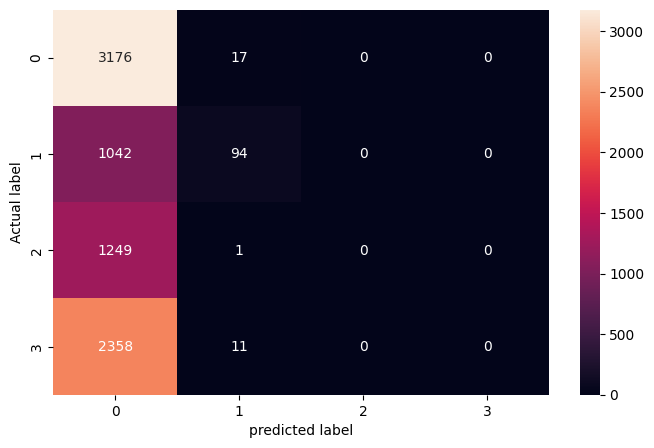

,Accuracy,Recall,Precision,F1-score
0,0.411424,0.269356,0.292527,0.181459


In [129]:
gb_train_cls = model_performance_classification(gb_clf, X_train, y_train)
gb_train_cls 

This result here is poor.The  Accuracy is 0.411424, Recall is 0.411424, precision is 0.272286 and the F1- score is 0.252948.This means that out of the original ratings, the model was able to predict 0.411424 (41%) correctly. The model was able to 27.2% prediction correctly.This is as a result of inbalance data.One category of data seems to be appearig more frequently than others hence the model seems to learn more on that dataset. The dataset is E from the Rating column. This can still be improved upon to make the better work well. 

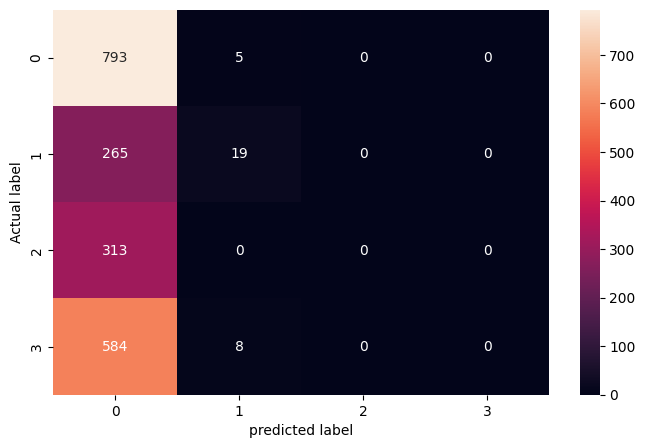

,Accuracy,Recall,Precision,F1-score
0,0.408656,0.265159,0.249844,0.174088


In [130]:
# check performance on the testing data

gb_test_cls = model_performance_classification(gb_clf, X_test, y_test)
gb_test_cls 

The test results showed that almost the samething as that of training showing. The model is not performing well on both training and test which shows that it is underfitting

#### Model Improvement
- Balancing the data

In [131]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)

In [132]:
X_sm, y_sm = sm.fit_resample(X_new, y_new)

In [133]:
from collections import Counter

In [134]:
Counter(y_sm)

Counter({0: 3991, 2: 3991, 3: 3991, 1: 3991})

The data have been artificially balanced to enable me build a better model

In [135]:
#resplit the data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0,
                                                   stratify = y_sm)


In [136]:
#train the model
gb_clf2 = GradientBoostingClassifier(random_state = 0)

#train the Gradient model Classifier
gb_clf2.fit(X_train, y_train) 

GradientBoostingClassifier(random_state=0)

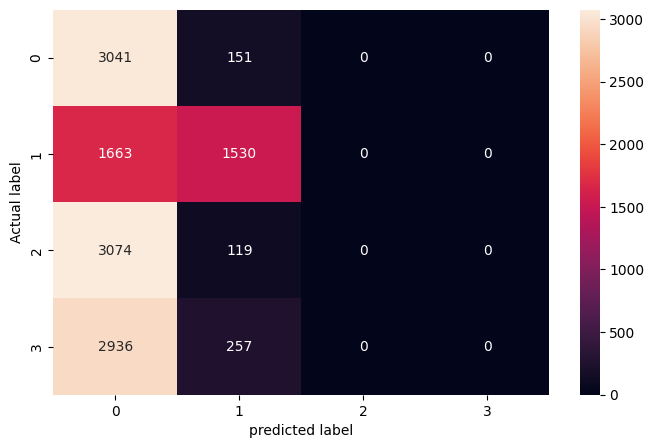

,Accuracy,Recall,Precision,F1-score
0,0.35792,0.357967,0.256909,0.255056


In [137]:
#performance checks on training
gb_clf2_train = model_performance_classification(gb_clf2,X_train, y_train)
gb_clf2_train

The model even did more poorer in training

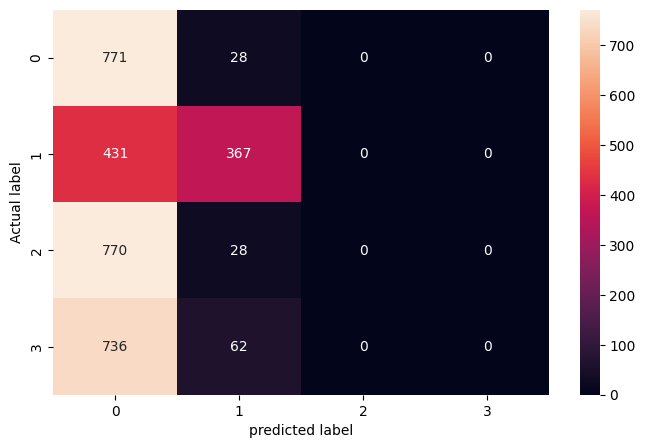

,Accuracy,Recall,Precision,F1-score
0,0.356405,0.356214,0.260353,0.252947


In [138]:
#performance checks on test
gb_clf2_test = model_performance_classification(gb_clf2,X_test, y_test)
gb_clf2_test

The model is underfiting because the accuracy, recall, precission and F1-score. This showed that the model is struggling to understand the pattern in the data.The model finds it difficult to find how these features helps it to predict the ratings.

#### Genre as a relevant Categorical variable

In [139]:
#select features and target
X_G = new_videoGame_data[['Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
                   'User_Score', 'User_Count','Platformprimary','Global_Sales']]
# using Rating as the target
y_G = new_videoGame_data['Genre']

In [140]:
X_G

,Rating,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platformprimary,Global_Sales
0,E,0.60,0.275,0.1,0.075,76.0,51.0,7.5,50.0,Wii,82.53
2,E,0.60,0.275,0.1,0.075,82.0,52.5,7.5,50.0,Wii,35.52
3,E,0.60,0.275,0.1,0.075,80.0,52.5,7.5,50.0,Wii,32.77
6,E,0.60,0.275,0.1,0.075,89.0,52.5,7.5,50.0,DS,29.80
7,E,0.60,0.275,0.1,0.075,58.0,41.0,7.5,50.0,Wii,28.92
...,...,...,...,...,...,...,...,...,...,...,...
16699,E,0.01,0.000,0.0,0.000,53.0,4.0,7.5,0.0,Others,0.01
16700,E,0.01,0.000,0.0,0.000,48.0,10.0,7.5,0.0,DS,0.01
16704,E10+,0.00,0.010,0.0,0.000,60.0,12.0,7.5,13.0,Others,0.01
16706,E,0.01,0.000,0.0,0.000,0.0,0.0,7.5,0.0,DS,0.01


In [141]:
#OneHotEncoding on my selected features
Xg_new = pd.get_dummies(X_G,drop_first = True)

In [142]:
#encode the target
le = LabelEncoder()
yg_new = le.fit_transform(y_G)
yg_new

array([10,  6, 10, ..., 11,  9,  8])

In [143]:
#split the data

from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xg_new, yg_new, test_size=0.2, random_state=0,
                                                   stratify = yg_new)


In [144]:
from sklearn.ensemble import GradientBoostingClassifier
#train the model
gb_clf2_g = GradientBoostingClassifier(random_state = 0)

#train the Gradient model Classifier
gb_clf2_g.fit(X_train, y_train) 

GradientBoostingClassifier(random_state=0)

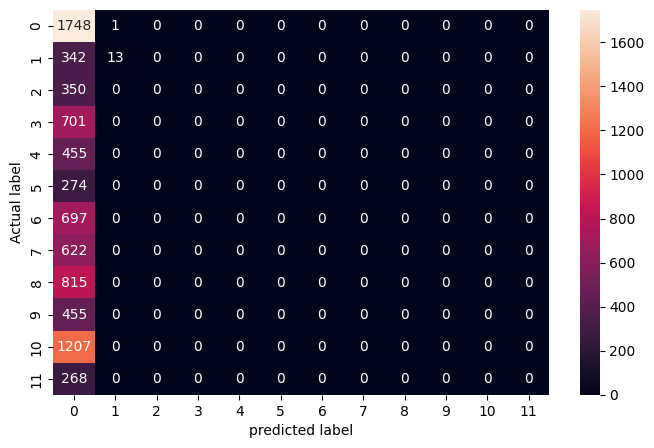

,Accuracy,Recall,Precision,F1-score
0,0.221565,0.086337,0.095741,0.035959


In [145]:
gb_clf2_g_train = model_performance_classification(gb_clf2_g, X_train, y_train)
gb_clf2_g_train

The Genre model performed poorly on the training with the accuracy and recall values at 0.221565 while precision and F1-score has 0.089957 and 0.082597 respectively.

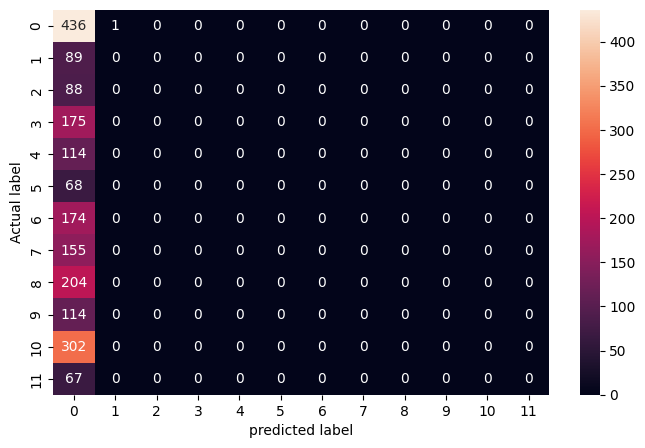

,Accuracy,Recall,Precision,F1-score
0,0.219426,0.083143,0.018295,0.02999


In [146]:
gb_clf2_g_test = model_performance_classification(gb_clf2_g, X_test, y_test)
gb_clf2_g_test

The model also performed very poorly on the test. It continually underfits

#### Platformprimary (Platform) as a relevant Categorical variable

In [147]:
#select features and target
X_P = new_videoGame_data[['Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
                   'User_Score', 'User_Count','Genre','Global_Sales']]
# using Rating as the target
y_P = new_videoGame_data['Platformprimary']

In [148]:
#OneHotEncoding on my selected features
Xp_new = pd.get_dummies(X_P,drop_first = True)

In [149]:
#encode the target
le = LabelEncoder()
yp_new = le.fit_transform(y_P)
yp_new

array([6, 6, 6, ..., 1, 0, 1])

In [150]:

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xp_new, yp_new, test_size=0.2, random_state=0,
                                                   stratify = yp_new)

In [151]:
#train the model
gb_clf2_p = GradientBoostingClassifier(random_state = 0)

#train the Gradient model Classifier
gb_clf2_p.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

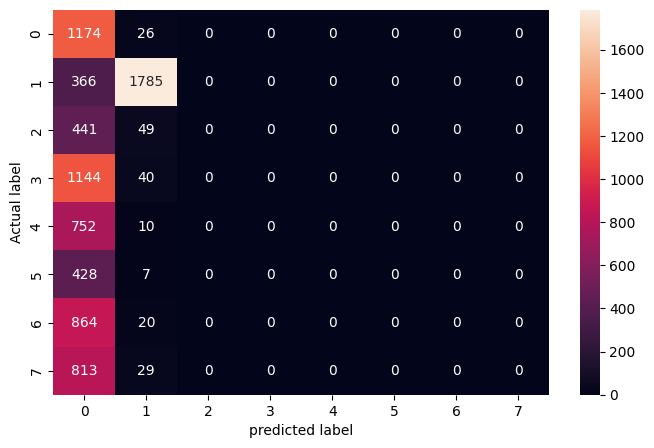

,Accuracy,Recall,Precision,F1-score
0,0.372295,0.226022,0.138024,0.149258


In [152]:
gb_clf2_p_train = model_performance_classification(gb_clf2_p, X_train, y_train)
gb_clf2_p_train

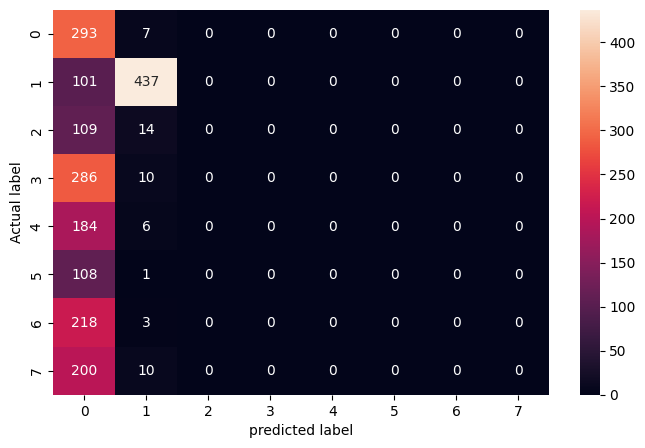

,Accuracy,Recall,Precision,F1-score
0,0.367388,0.223617,0.136369,0.147199


In [153]:
gb_clf2_p_test = model_performance_classification(gb_clf2_p, X_test, y_test)
gb_clf2_p_test

I all the 3 categorical variables (Rating, Genre and Platform), the Accuracy and Recall has the same values. This is because my model is not complex enough. This is also one of the reasons why this model overfits

### UnSupervised Learning

##### 2g.In the video game dataset, use a relevant categorical variable and other relevant noncategorical variables to form groups at each instance. By employing internal and external evaluation metrics, determine which categorical variable best describes the groups formed.

In [154]:
import pandas as pd
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [155]:
videoGame_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platformprimary,Global_Sales_log
0,Wii Sports,Wii,2006.0,Sports,Nintendo,0.6,0.275,0.1,0.075,82.53,76.0,51.0,7.5,50.0,Nintendo,E,Wii,4.413162
1,Super Mario Bros.,NES,1992.5,Platform,Nintendo,0.6,0.275,0.1,0.075,40.24,0.0,0.0,7.5,0.0,NaN,Unknown,Others,3.694862
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.6,0.275,0.1,0.075,35.52,82.0,52.5,7.5,50.0,Nintendo,E,Wii,3.570096
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.6,0.275,0.1,0.075,32.77,80.0,52.5,7.5,50.0,Nintendo,E,Wii,3.489513
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.6,0.275,0.1,0.075,31.37,0.0,0.0,7.5,0.0,NaN,Unknown,Others,3.445852


In [156]:
videoGame_data.isna().sum()

Name                   0
Platform               0
Year_of_Release      269
Genre                  0
Publisher             54
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer           6621
Rating                 0
Platformprimary        0
Global_Sales_log       0
dtype: int64

### Genre Categorical Variable

In [157]:
videoGame_data2 = videoGame_data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales',]]

In [158]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Genre" column of videoGame_data2
videoGame_data2["Genre_encode"] = le.fit_transform(videoGame_data2["Genre"])

In [159]:
#To select the numerical vaiables
Xs = videoGame_data2.select_dtypes(include='number')

In [160]:
#nomalize the data using standard scaler

Scaler = StandardScaler()
x_sd = scaler.fit_transform(Xs)

In [161]:
#### using K-means clustering method.
from sklearn.cluster import KMeans

In [162]:
# determining the number of clustering

SSE = []

for i in range(1, 10):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(x_sd)
    SSE.append(Kmeans.inertia_)

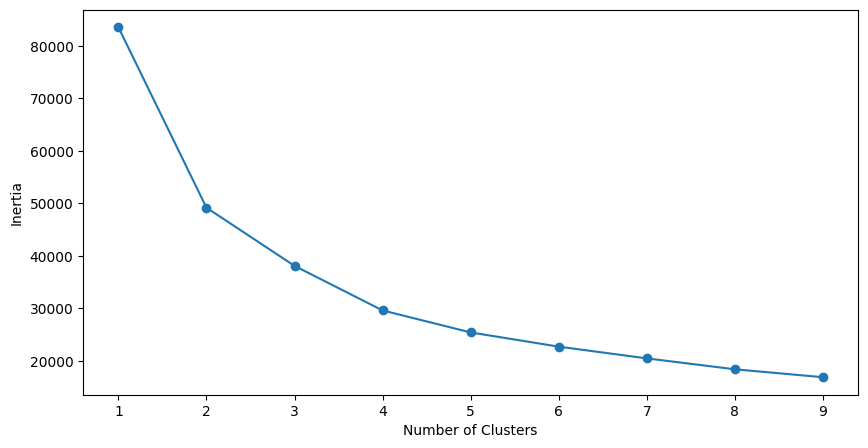

In [163]:
frame = pd.DataFrame({'Cluster': range(1, 10), 'SSE': SSE})

plt.figure(figsize = (10, 5))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

This called elbow curve. I will pick 3 groups for my number of cluster. The visualization helps me to pick my number of clusters.

In [164]:
#rebuild K means with 3 as number of clusters.

Kmeans = KMeans(n_clusters = 3, random_state = 0)
#make prediction for the group for my data
pred = Kmeans.fit_predict(x_sd)

In [165]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 3

# Create a KMeans object and fit it to the data
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x_sd)

# Get the cluster labels
C_labels = kmeans.labels_


In [166]:
# to check the number of my groups
np.unique(pred)

array([0, 1, 2])

In [167]:
videoGame_data2['Cluster'] = pred

In [168]:

#select all the column
num_col = videoGame_data2.select_dtypes(include = 'number').columns.tolist()
num_col

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre_encode', 'Cluster']

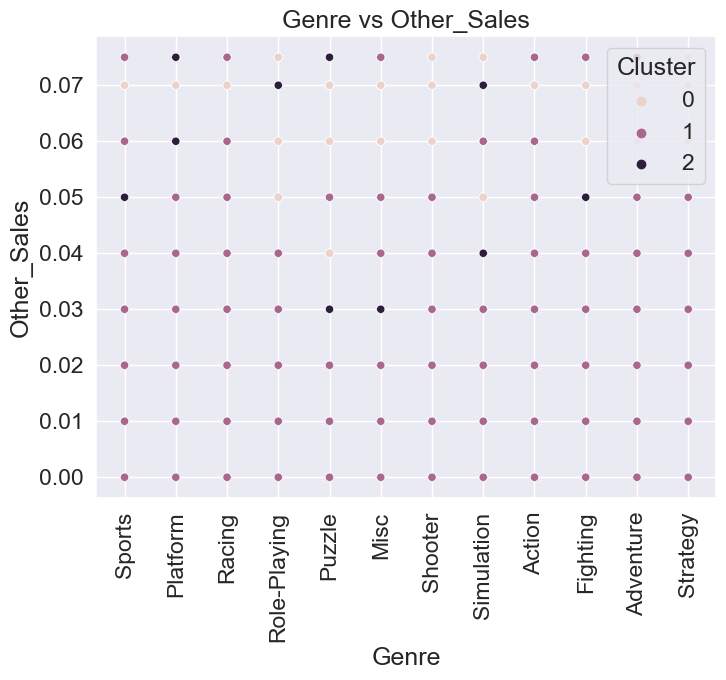

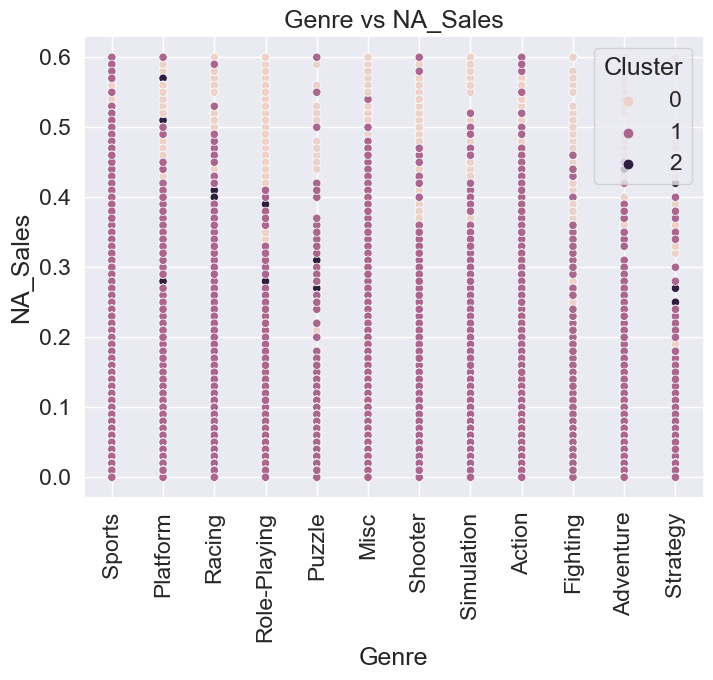

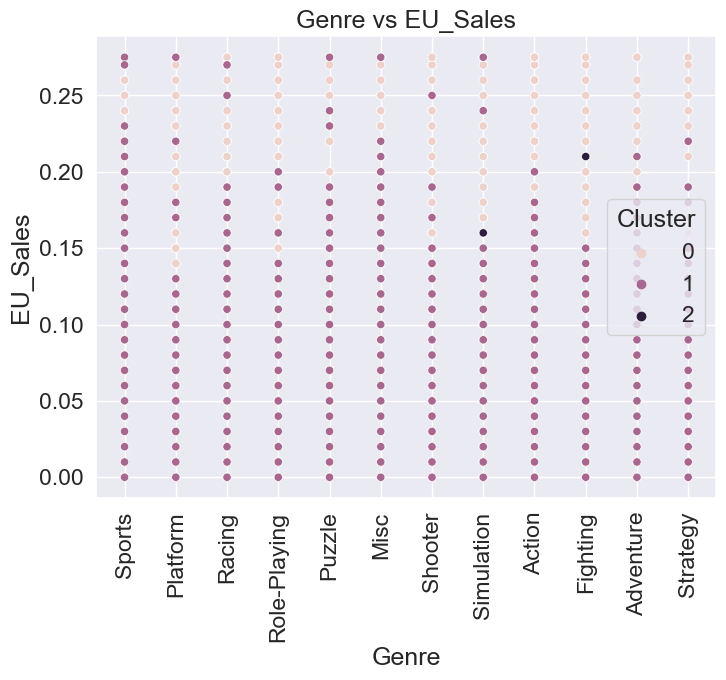

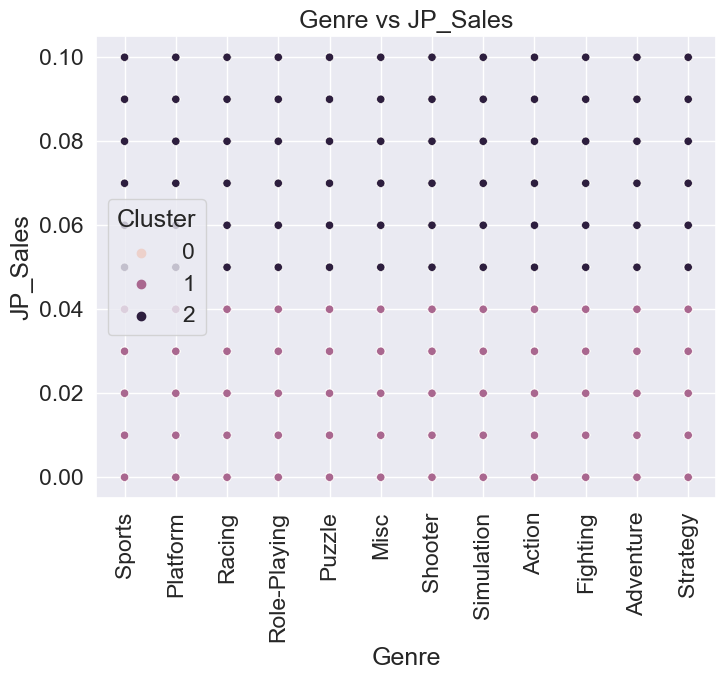

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical and non-categorical variable combinations
categorical_vars = ['Genre']
non_categorical_vars = ['Other_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']

# Create scatterplots for each combination of categorical and non-categorical variables
for cat_var in categorical_vars:
    for nc_var in non_categorical_vars:
        plt.figure(figsize=(8, 6), dpi=100)
        sns.set(font_scale=1.5)
        sns.scatterplot(x=cat_var, y=nc_var, data=videoGame_data2, hue='Cluster')
        plt.xticks(rotation=90)
        plt.title(f'{cat_var} vs {nc_var}')
        plt.show()




In [170]:
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans

# Get the true class labels
y_true = videoGame_data2['Genre']


In [198]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')

# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')

# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_sd, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_sd, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')

c_score = calinski_harabasz_score(x_sd, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score: 0.064
Rand Index Score: 0.017
Mutual Information Score: 0.063

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.043
Silhouette Coefficient: 0.374
Calinski Harabasz Score: 9977.554


### Platformprimary Categorical variable

In [172]:
videoGame_data3 = videoGame_data[['Platformprimary', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']]

In [173]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Genre" column of videoGame_data2
videoGame_data3["Platformprimary"] = le.fit_transform(videoGame_data3["Platformprimary"])

In [174]:
#To select the numerical vaiables
Xp = videoGame_data3.select_dtypes(include='number')

In [175]:
#nomalize the data using standard scaler

Scaler = StandardScaler()
x_platform = scaler.fit_transform(Xp)

In [176]:
#determining the number of clustering

Platform_cluster = []

for i in range(1, 10):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(x_sd)
    Platform_cluster.append(Kmeans.inertia_)

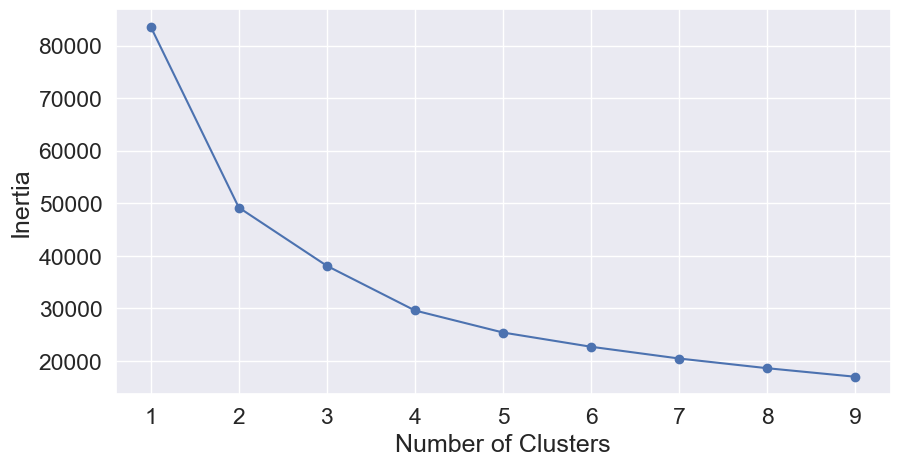

In [177]:
frame = pd.DataFrame({'Cluster': range(1, 10), 'Platform_cluster': Platform_cluster})

plt.figure(figsize = (10, 5))
plt.plot(frame['Cluster'], frame['Platform_cluster'], marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [178]:
videoGame_data3['Cluster'] = pred

In [179]:

#select all the column
num_col = videoGame_data3.select_dtypes(include = 'number').columns.tolist()
num_col

['Platformprimary',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Cluster']

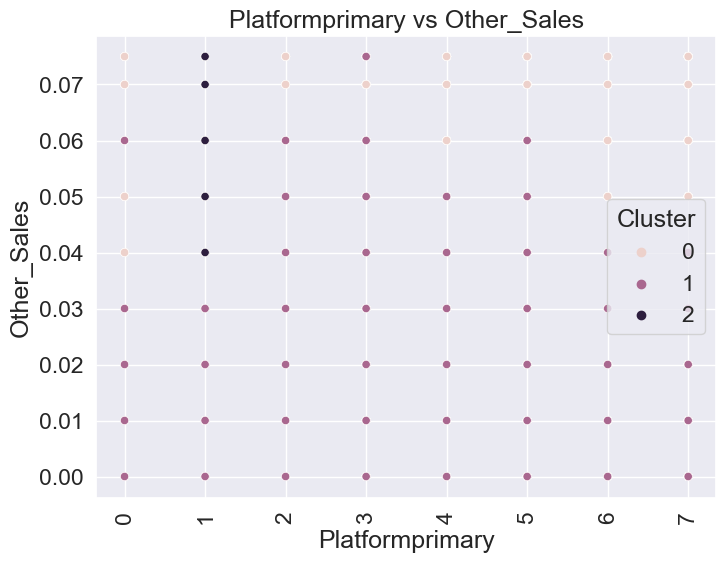

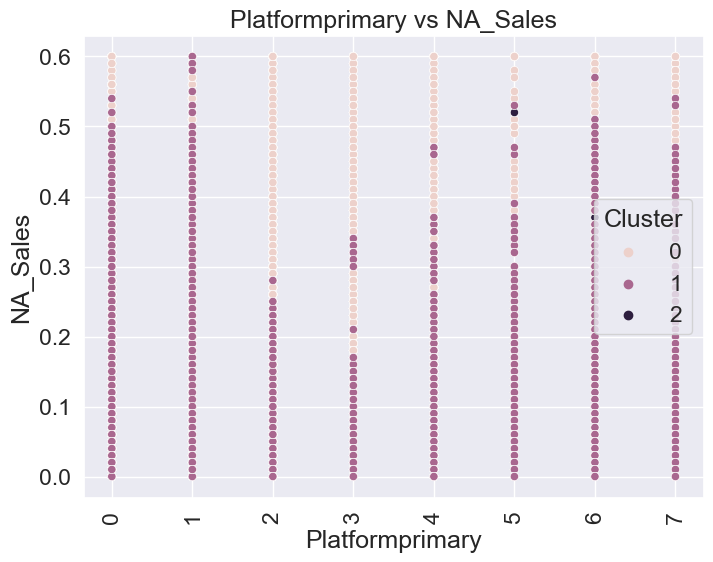

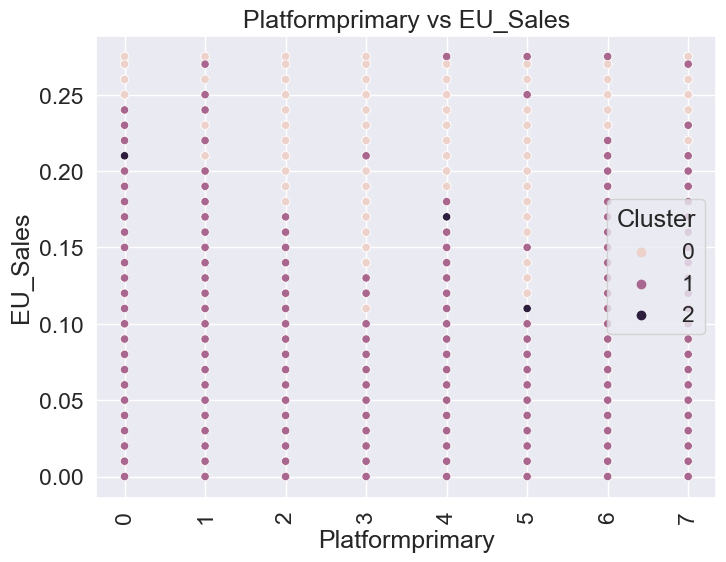

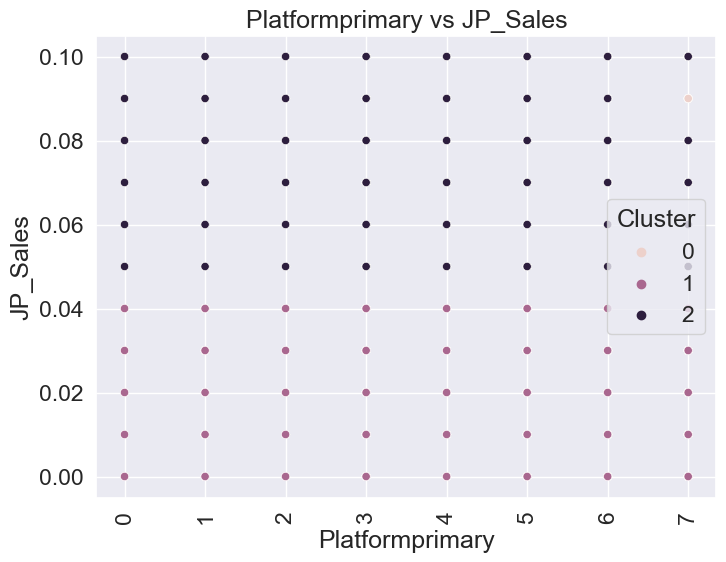

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical and non-categorical variable combinations
categorical_vars = ['Platformprimary']
non_categorical_vars = ['Other_Sales','NA_Sales', 'EU_Sales', 'JP_Sales']

# Create scatterplots for each combination of categorical and non-categorical variables
for cat_var in categorical_vars:
    for nc_var in non_categorical_vars:
        plt.figure(figsize=(8, 6), dpi=100)
        sns.set(font_scale=1.5)
        sns.scatterplot(x=cat_var, y=nc_var, data=videoGame_data3, hue='Cluster')
        plt.xticks(rotation=90)
        plt.title(f'{cat_var} vs {nc_var}')
        plt.show()

In [181]:
# Get the true class labels
y_true = videoGame_data3['Platformprimary']

In [182]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')

# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')

# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_platform, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_platform, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')

c_score = calinski_harabasz_score(x_platform, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')



External Evaluation Measures
********************************
V-measure Score: 0.030
Rand Index Score: 0.024
Mutual Information Score: 0.029

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.998
Silhouette Coefficient: 0.381
Calinski Harabasz Score: 10190.596


### Rating Categorical variable

In [183]:
videoGame_data4 = videoGame_data[['Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales',]]

In [184]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Genre" column of videoGame_data2
videoGame_data4["Rating"] = le.fit_transform(videoGame_data4["Rating"])

In [185]:
#To select the numerical vaiables
Xr = videoGame_data4.select_dtypes(include='number')

In [186]:
Scaler = StandardScaler()
x_rating = scaler.fit_transform(Xr)

In [187]:
#determining the number of clustering

rating_cluster = []

for i in range(1, 10):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(x_rating)
    rating_cluster.append(Kmeans.inertia_)

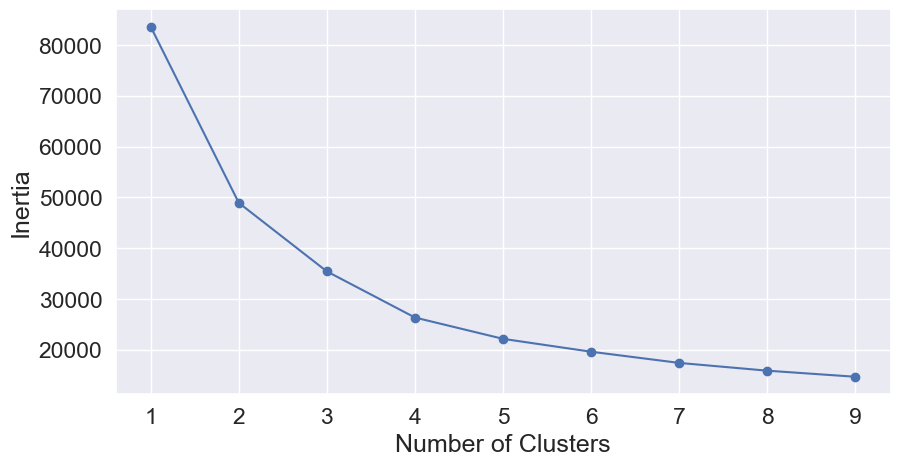

In [188]:
frame = pd.DataFrame({'Cluster': range(1, 10), 'rating_cluster': rating_cluster})

plt.figure(figsize = (10, 5))
plt.plot(frame['Cluster'], frame['rating_cluster'], marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [189]:
videoGame_data4['Cluster'] = pred

In [190]:
#select all the column
num_col = videoGame_data4.select_dtypes(include = 'number').columns.tolist()
num_col

['Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Cluster']

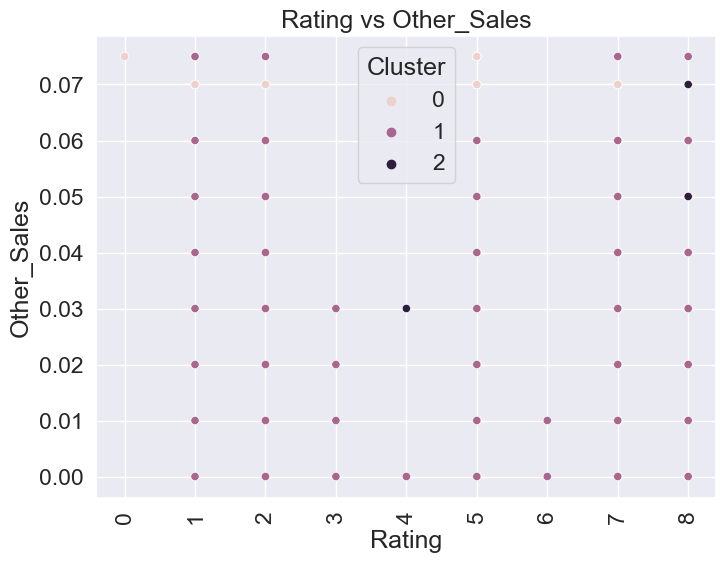

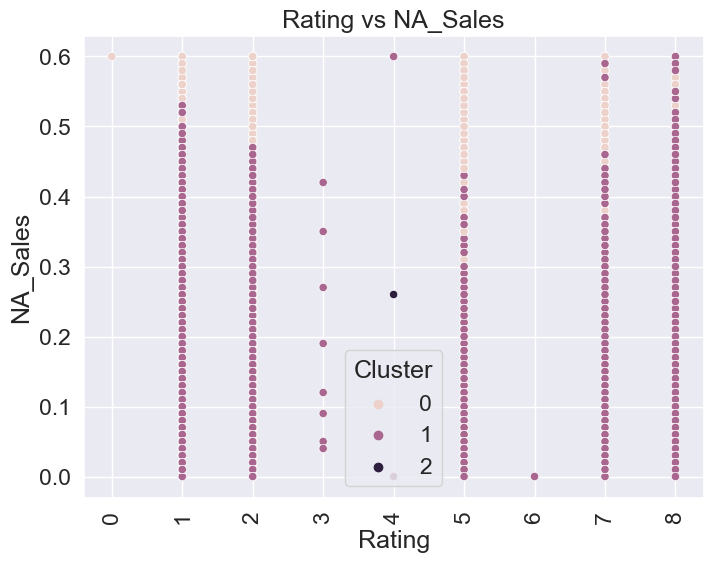

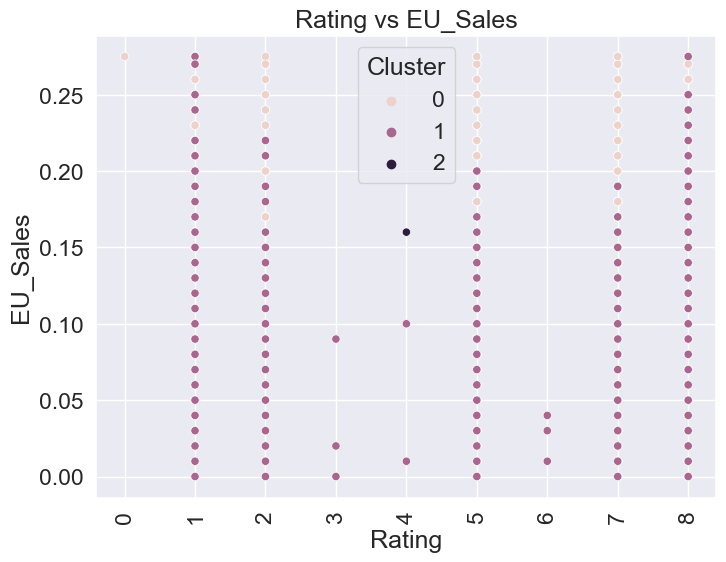

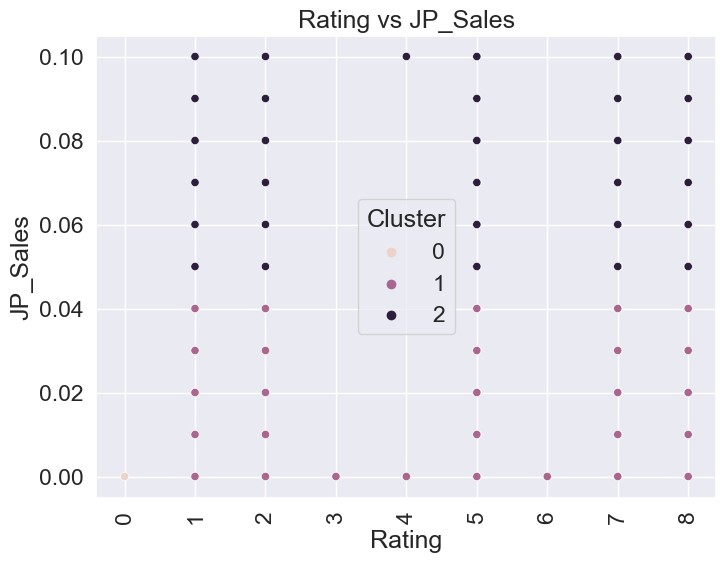

In [191]:
# Define the categorical and non-categorical variable combinations
categorical_vars = ['Rating']
non_categorical_vars = ['Other_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']

# Create scatterplots for each combination of categorical and non-categorical variables
for cat_var in categorical_vars:
    for nc_var in non_categorical_vars:
        plt.figure(figsize=(8, 6), dpi=100)
        sns.set(font_scale=1.5)
        sns.scatterplot(x=cat_var, y=nc_var, data=videoGame_data4, hue='Cluster')
        plt.xticks(rotation=90)
        plt.title(f'{cat_var} vs {nc_var}')
        plt.show()

In [192]:
# Get the true class labels
y_true = videoGame_data4['Rating']

In [193]:
# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')

# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')

# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_rating, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_rating, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')

c_score = calinski_harabasz_score(x_rating, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')



External Evaluation Measures
********************************
V-measure Score: 0.064
Rand Index Score: 0.017
Mutual Information Score: 0.063

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.934
Silhouette Coefficient: 0.393
Calinski Harabasz Score: 10701.493
